# Preface
In this notebook, I will try to use the COVID-19 data from [OWID](https://ourworldindata.org/coronavirus-source-data) in order to get a feel for doing basic  
data visualization and analysis

The main goals I have for this project are:

1. Learn about and gain experience using Python for basic data visualization and analysis
2. Gain some experience using machine learning algorithms to make predictive models
3. Try to parse through chunks of data and find relationships that may not be so obvious or  
apparent at first glance

Because I am going in to this project without a particular problem to be solved, I will start it off  
by attempting what I would consider relatively simple tasks (making basic relational plots and doing  
simple analysis based on them) then work my way up towards more advanced tasks.

# Progress Updates

- 12/2/2020 through 12/16: Started working on project; Analysis 1: made basic visualizations 
of normalized case and death rates in the US; Analysis 2: looked at stringency index values  
and their correlation with case and death rates; made preliminary plots for Analysis 3 which  
will be for making more comparisons between multiple countries
- 12/28/2020 through 1/10/2021: Added Analysis 4; Predicted US Case numbers over time by  
making multiple predictive models using the sklearn library for Python; models were compared  
using different metrics to test error scores and determine model accuracy

# Analysis 1: Looking at Case and Death values in the US

The first thing I want to do is make a few basic plots for COVID metrics for the US.

In [88]:
# import pandas and numpy to work on data given
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn as sns

In [89]:
# download and save data that is uploaded daily
import urllib.request

url = 'https://covid.ourworldindata.org/data/owid-covid-data.json'
urllib.request.urlretrieve(url, 'owid-covid-data.json')

In [90]:
# read json of downloaded data
data = pd.read_json('owid-covid-data.json', orient='values').transpose()

In [91]:
# take a look at the data
data.head()

,continent,location,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,data,extreme_poverty,female_smokers,male_smokers
AFG,Asia,Afghanistan,3.89283e+07,54.422,18.6,2.581,1.337,1803.99,597.029,9.59,37.746,0.5,64.83,0.498,"[{'date': '2020-02-24', 'total_cases': 1.0, 'n...",NaN,NaN,NaN
ALB,Europe,Albania,2.8778e+06,104.871,38,13.188,8.643,11803.4,304.195,10.08,NaN,2.89,78.57,0.785,"[{'date': '2020-03-09', 'total_cases': 2.0, 'n...",1.1,7.1,51.2
DZA,Africa,Algeria,4.3851e+07,17.348,29.1,6.211,3.857,13913.8,278.364,6.73,83.741,1.9,76.88,0.754,"[{'date': '2020-02-25', 'total_cases': 1.0, 'n...",0.5,0.7,30.4
AND,Europe,Andorra,77265,163.755,NaN,NaN,NaN,NaN,109.135,7.97,NaN,NaN,83.73,0.858,"[{'date': '2020-03-02', 'total_cases': 1.0, 'n...",NaN,29,37.8
AGO,Africa,Angola,3.28663e+07,23.89,16.8,2.405,1.362,5819.49,276.045,3.94,26.664,NaN,61.15,0.581,"[{'date': '2020-03-20', 'total_cases': 1.0, 'n...",NaN,NaN,NaN


In [92]:
data.describe()

,continent,location,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,data,extreme_poverty,female_smokers,male_smokers
count,190,191,191.0,187.000,182.0,180.000,181.000,183.000,184.000,187.00,95.000,167.0,190.00,184.000,191,124.0,143.0,141.0
unique,6,191,191.0,187.000,130.0,179.000,177.000,183.000,184.000,136.00,95.000,100.0,178.00,158.000,191,75.0,108.0,124.0
top,Africa,Qatar,32971846.0,255.573,32.4,6.933,1.726,7423.808,255.569,2.42,19.275,0.7,76.88,0.757,"[{'date': '2020-02-26', 'icu_patients': 0.0, '...",0.2,2.0,24.7
freq,54,1,1.0,1.000,4.0,2.000,2.000,1.000,1.000,13.00,1.000,7.0,3.00,3.000,1,13.0,4.0,4.0


In [93]:
# extract data for US data
usa_data = pd.DataFrame.from_dict(data.loc['USA','data'])
usa_data.replace(np.nan, 0, inplace=True)

In [94]:
usa_data.head()

,date,total_cases,total_cases_per_million,stringency_index,new_cases,new_cases_per_million,new_cases_smoothed,new_deaths_smoothed,new_cases_smoothed_per_million,new_deaths_smoothed_per_million,...,new_tests_smoothed,new_tests_smoothed_per_thousand,hosp_patients,hosp_patients_per_million,icu_patients,icu_patients_per_million,total_vaccinations,total_vaccinations_per_hundred,new_vaccinations,new_vaccinations_per_million
0,2020-01-22,1.0,0.003,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-23,1.0,0.003,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-24,2.0,0.006,0.0,1.0,0.003,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-25,2.0,0.006,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-26,5.0,0.015,0.0,3.0,0.009,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
usa_data.drop(usa_data.tail(1).index,inplace=True)

When looking at data over time for the US, the main metrics that I'd like to plot include total  
cases, total deaths, daily cases, and daily deaths.

Text(0.5, 0, 'Date (yyyy-mm-dd)')

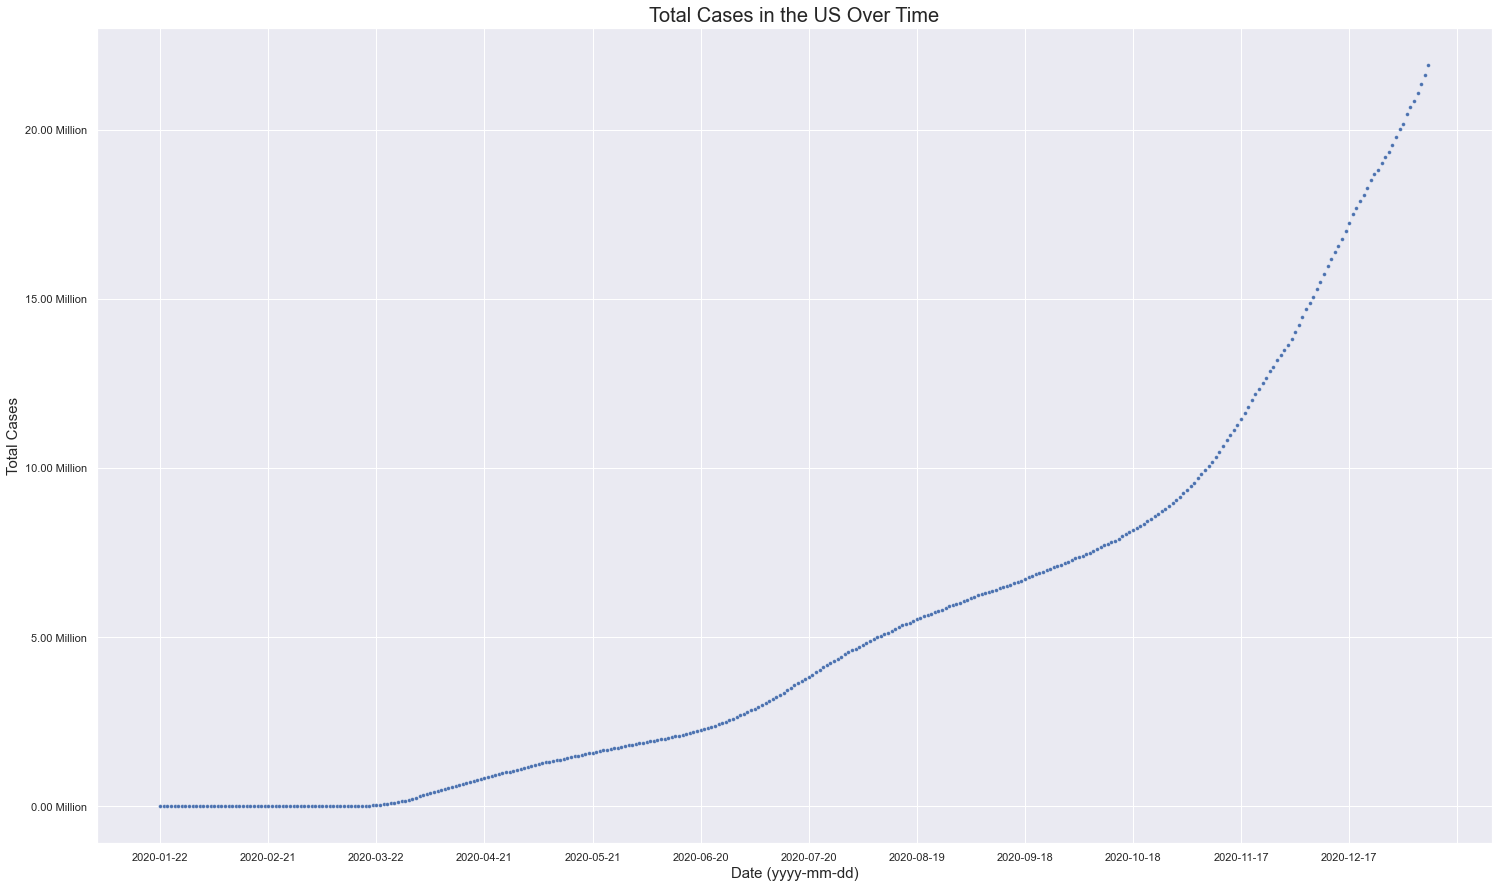

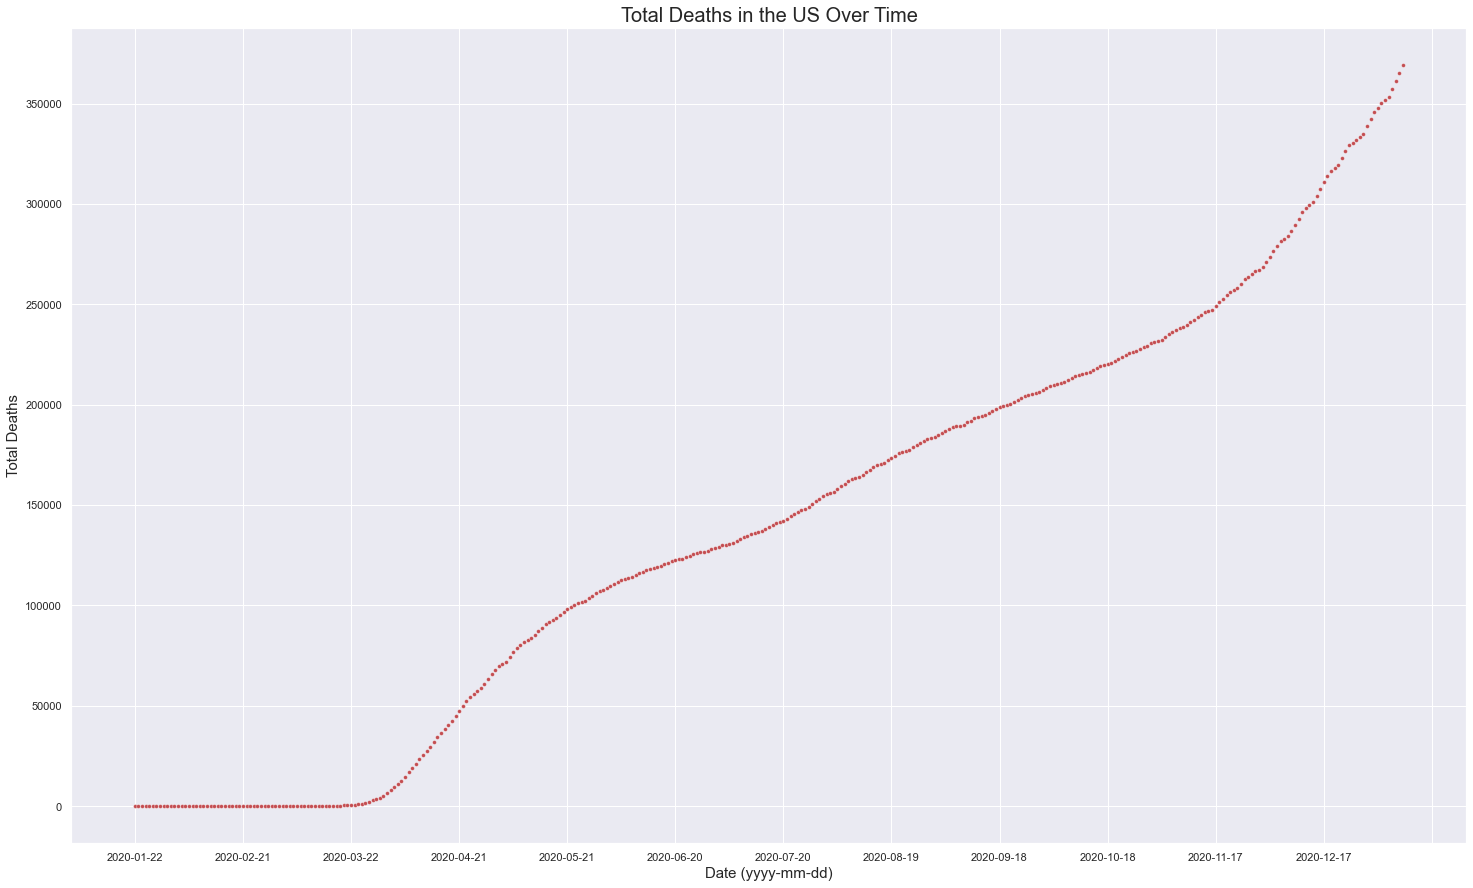

In [96]:
# plot total cases over time
fig, ax = plt.subplots(figsize=(25,15))
sns.set_theme()
ax = sns.scatterplot(data=usa_data, x='date',y='total_cases', s=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + ' Million'))
ax.set_title('Total Cases in the US Over Time',size=20)
ax.set_ylabel('Total Cases', size=15)
ax.set_xlabel('Date (yyyy-mm-dd)', size=15)

# plot total deaths over time
fig, ax = plt.subplots(figsize=(25,15))
sns.set_theme()
ax = sns.scatterplot(data=usa_data, x='date',y='total_deaths', s=15, color='r')
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.set_title('Total Deaths in the US Over Time', size=20)
ax.set_ylabel('Total Deaths', size=15)
ax.set_xlabel('Date (yyyy-mm-dd)', size=15)

Looking at the plots, we see that total cases is exponentially increasing for the most part while  
the rate of total deaths varies. To take a further look, I'll plot the daily cases and deaths  
over time.

Text(0.5, 0, 'Date (yyyy-mm-dd)')

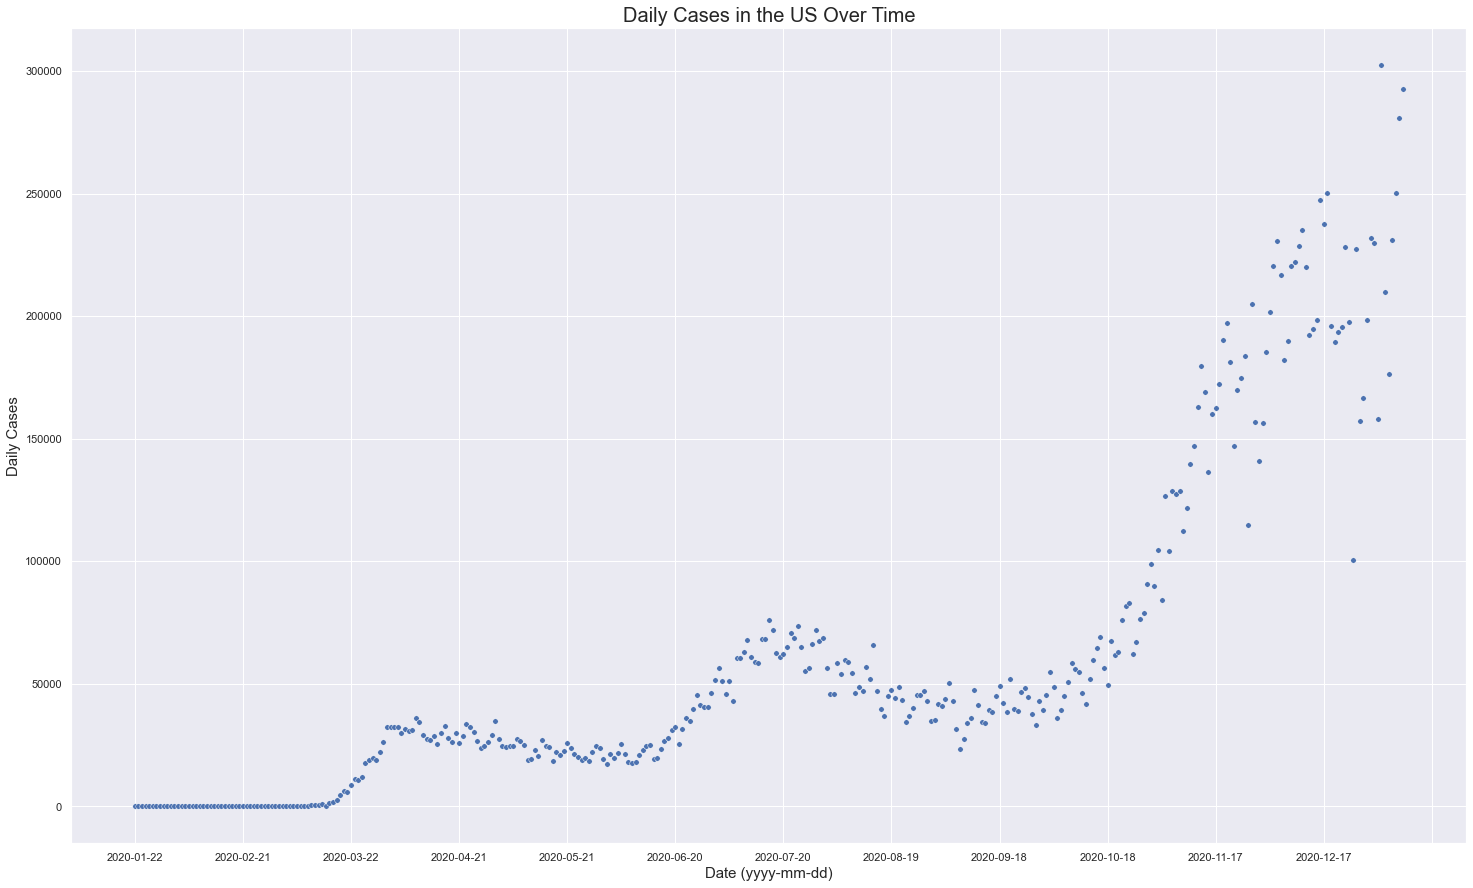

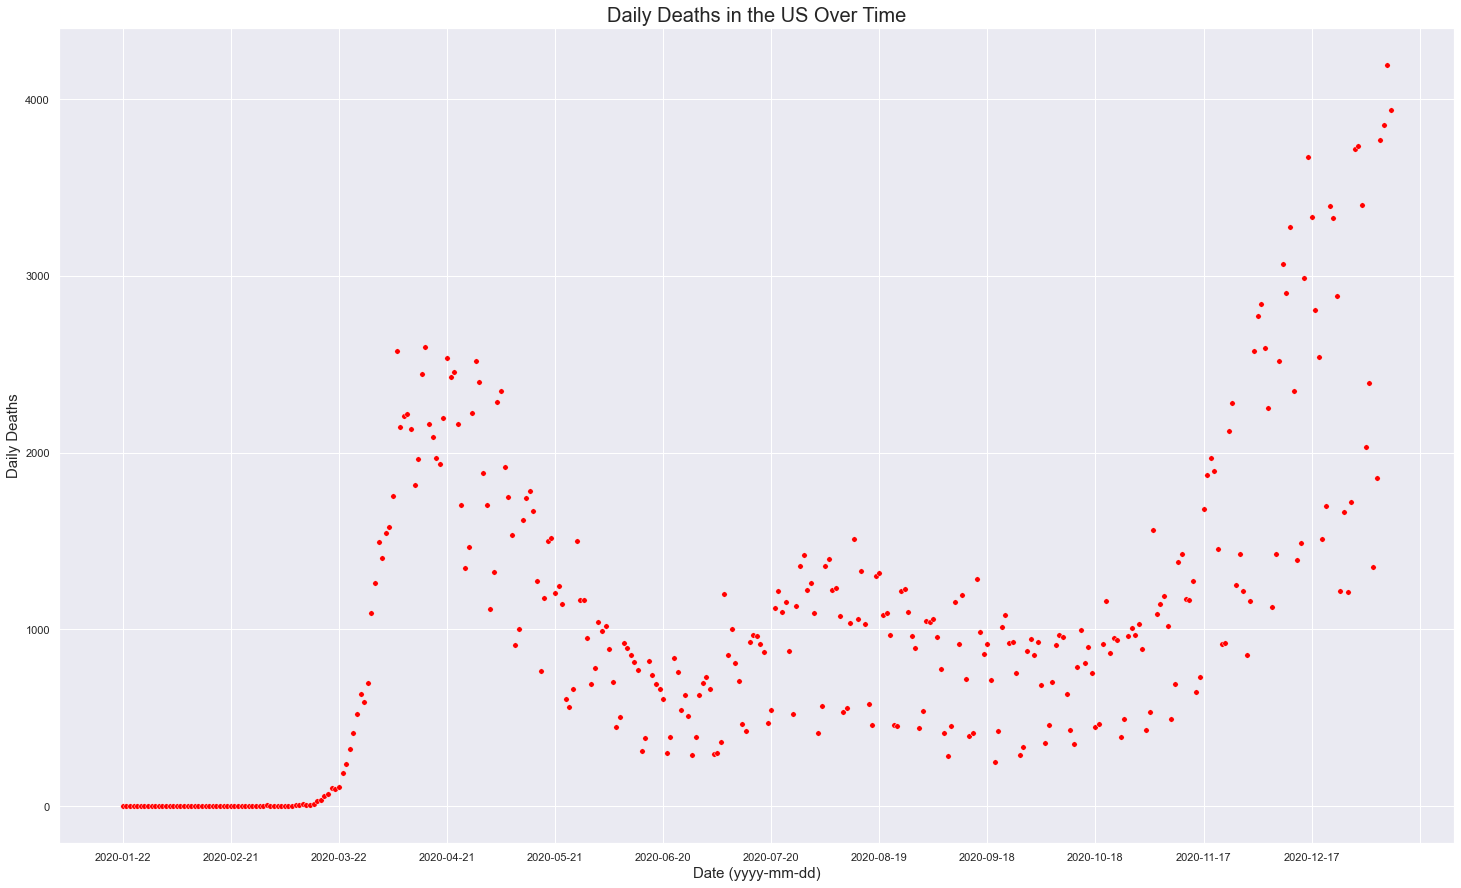

In [97]:
# plot new daily cases over time
fig, ax = plt.subplots(figsize=(25,15))
sns.set_theme()
ax = sns.scatterplot(data=usa_data, x='date',y='new_cases', s=30)
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.set_title('Daily Cases in the US Over Time', size=20)
ax.set_ylabel('Daily Cases', size=15)
ax.set_xlabel('Date (yyyy-mm-dd)', size=15)

# plot new daily deaths over time
fig, ax = plt.subplots(figsize=(25,15))
sns.set_theme()
ax = sns.scatterplot(data=usa_data, x='date',y='new_deaths', s=30, color='red')
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.set_title('Daily Deaths in the US Over Time', size=20)
ax.set_ylabel('Daily Deaths', size=15)
ax.set_xlabel('Date (yyyy-mm-dd)', size=15)

When looking at the daily cases and deaths, we see that both the rates of cases and deaths have  
spikes where they increase significantly and the most recent trends show a trend of increasing  
exponentially. Both metrics similar shapes with spikes occuring in the same time periods.

**There are a few questions/talking points that these plots bring up**:  
1. Are there specific explanations for the spikes in daily cases and deaths that occur in April  
and July? Why are case/death rates spiking rather than constantly increasing?
2. Is there a particular reason as to why death rates were especially bad during the initial  
outbreak period in March/April?

To answer these, I need to look up some resources and articles regarding COVID.

**Question 1**  

The first question can most likely be explained by national and state policies made in response  
to the pandemic (lockdowns, social distancing reopening, etc.). The [USA Today Coronavirus Timeline](https://www.usatoday.com/in-depth/news/nation/2020/04/21/coronavirus-updates-how-covid-19-unfolded-u-s-timeline/2990956001/)  
shows key events regarding COVID and its unfolding over the past year. In addition, Wikipedia has  
a [timeline page for events and responses related to COVID-19 across the world](https://en.wikipedia.org/wiki/Timeline_of_the_COVID-19_pandemic).

When trying to find any relations between particular events and daily case/death spikes, it's  
important to note that COVID-19 is generally accepted to have an incubation period of up to  
14 days, so any events that occur up to and around 14 days prior to a spike may be a relevant  
cause/factor of the spike.  

The first spike in daily cases and deaths occurs around early April. COVID-19 was officially  
declared a national emergency on March 13. Soon after, states began enforcing policies such as  
masks mandates, social distancing, and stay-at-home orders in order to curb infection rates. A lot  
of these policies began rolling out during the latter half of April. As a result, we can assume  
that the first 15-20 days of March saw a large amount of transmission as most people carried on  
with gatherings and going out without any restrictions. By the time restrictions began being  
enforced, a large amount of people were already infected, which is proven by the spike in daily  
case rate seen in early April. For the next 2 months until mid-June, the effects of COVID response  
policies can be seen with decreasing daily deaths and almost constant cases (something that would  
be expected to decrease with stricter restriction policies). 

Then what about the spike in late June/early July? Throughout most of April and June, states began  
gradually relaxing restrictions and allowing businesses to reopen, thus leading to the increasing  
daily cases and deaths from mid-June to late-July. Around mid-July to early-July, states began  
reinstating business and gathering restrictions once it became apparent that cases were rising again  
and a second wave of infection was likely. Similar to the first spike, the daily cases and deaths saw  
a decrease in numbers, but after roughly two months these metrics began to rise again, and we are  
now at a point where they are at an all-time high. Recently, only a handful of states have returned  
to having stay-at-home orders/advisories. With this in mind, it is likely that numbers will continue  
to grow significantly until the recently developed COVID vaccines begin mass distribution.

**Question 2**

An important trend that can be seen from the plots is that overall death rates from COVID infections  
were decreasing over time. Despite daily cases increasing almost constantly since March, daily deaths  
were the worst during the initial outbreak phase in March and have only recently exceeded those  
levels once again (with corresponding daily case counts being roughly 7 times larger than March  
counts). Both [articles](https://www.medpagetoday.com/infectiousdisease/covid19/89750) and [academic studies](https://www.journalofhospitalmedicine.com/jhospmed/article/230561/hospital-medicine/trends-covid-19-risk-adjusted-mortality-rates?channel=28090) can be found online with some explanations.

Some of the key reasons mentioned in the sources found are:
1. A shift towards younger people, who have less risk factors, getting infected compared to March  
when older adults saw higher infection numbers.
2. Better clinical experience/more standardized approach to handling COVID patients
3. Improvements to both pharmacologic and non-pharmacologic treatments
4. Earlier intervention
5. Lower viral load due to mask wearing, social distancing, community awareness, etc.

# Analysis 2: Looking at Stringency Index in the US

Another metric that I am interested in analyzing is the strigency index. According to the OWID  
COVID-19 data codebook, the stringency index is a numerical composite measure based on  
government response indicators such as school closures, travel bans, workplace closures,  
etc. In general, the severity of impact that a disease has in a pandemic scenario is  
dependent on many factors, but one major factor is the response a government has in enforcing  
rules and policies to deal with the pandemic. By comparing stringency index values with daily  
case and death numbers, I believe I can get some insight on the way the US government  
responded to the COVID-19 pandemic.


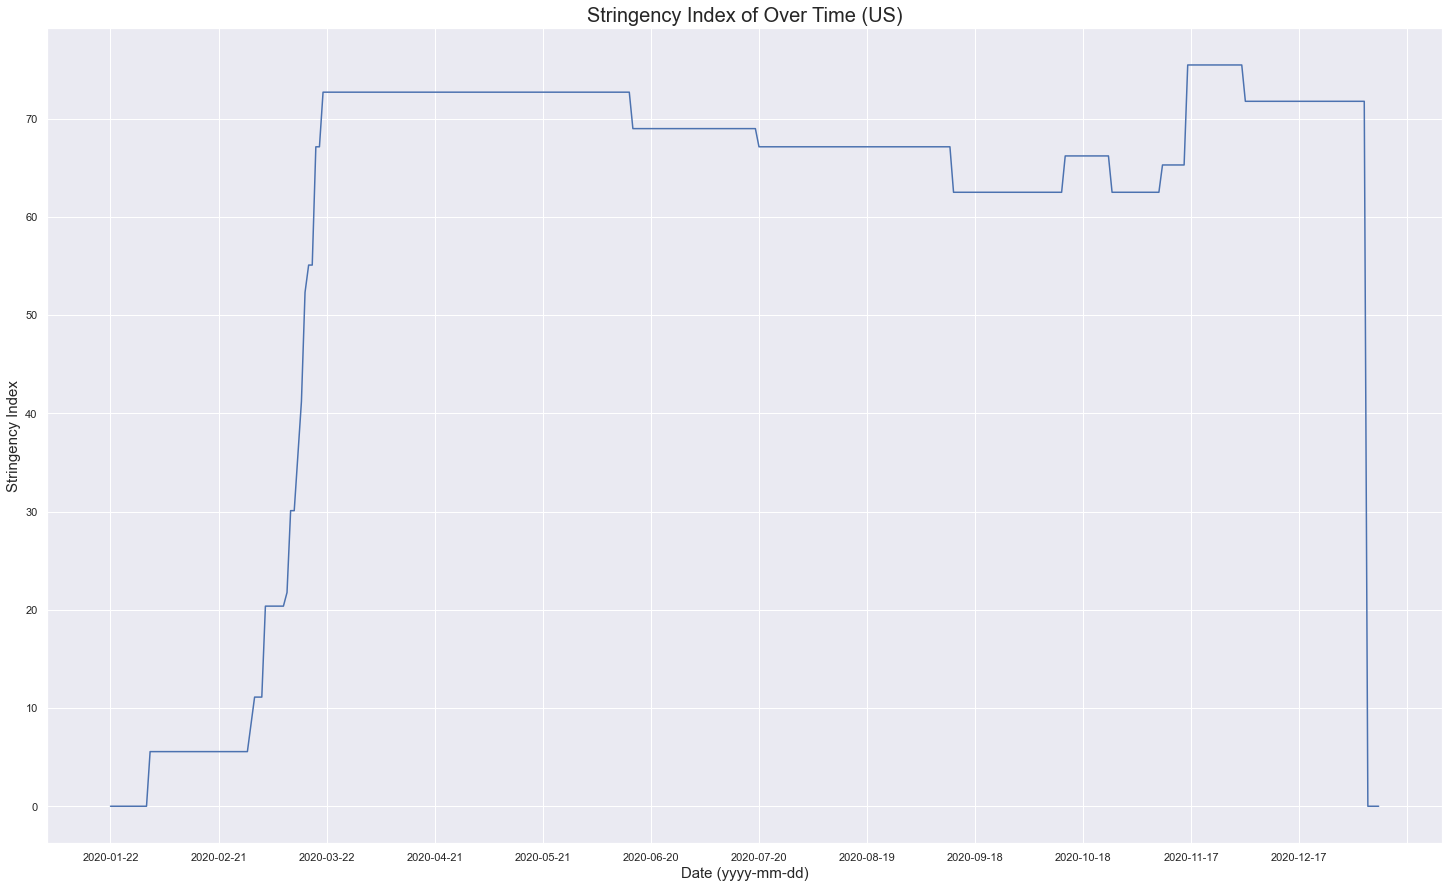

<Figure size 432x288 with 0 Axes>

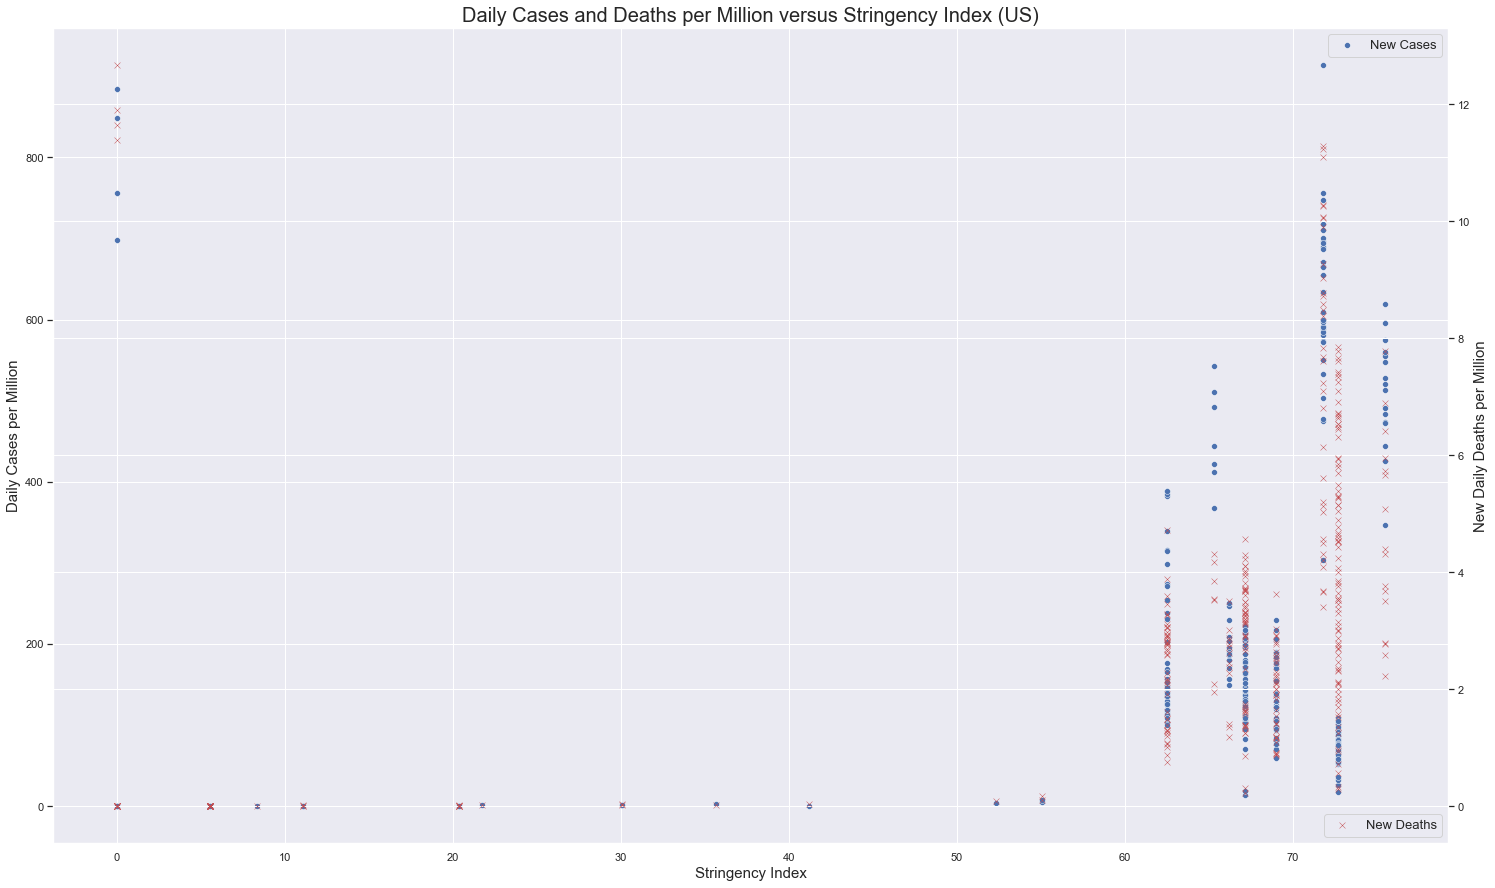

In [98]:
# plot stringency index over time
fig, ax = plt.subplots(figsize=(25,15))
sns.set_theme()
ax = sns.lineplot(data=usa_data, x='date',y='stringency_index')
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.set_title('Stringency Index of Over Time (US)',size=20)
ax.set_ylabel('Stringency Index', size=15)
ax.set_xlabel('Date (yyyy-mm-dd)', size=15)

# plot new daily cases and deaths versus stringency index
plt.figure()
fig, ax = plt.subplots(figsize=(25,15))
sns.set_theme()
ax = sns.scatterplot(data=usa_data, x='stringency_index',y='new_cases_per_million', s=35)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.set_title('Daily Cases and Deaths per Million versus Stringency Index (US)',size=20)
ax.set_ylabel('Daily Cases per Million', size=15)
ax.set_xlabel('Stringency Index', size=15)
ax2 = ax.twinx()
sns.scatterplot(data=usa_data, x='stringency_index',y='new_deaths_per_million', s=35, ax=ax2, color='r', marker='x')
ax2.set_ylabel('New Daily Deaths per Million', size=15)
ax.legend(['New Cases'], prop={'size': 13})
ax2.legend(['New Deaths'], loc=4, prop={'size': 13})

***Note: high case and death values occuring at x=0 are due to missing values in the dataset.  
It seems that stringency indexes from some countries are no longer being monitored sadly***

Here we see the change in stringency index over time and the number of daily cases and deaths  
in the US plotted versus corresponding stringency index values from the dates the values  
were taken from. From the first plot, the main trend I notice, is that starting from the end  
of March, around the time the outbreak started spreading in the US significantly, the  
stringency index jumps to over 60 and has stayed so since then. in the second plot, The main  
trend I notice is that the relatively high values of daily cases and deaths only occur at  
high stringency values (above 60 in this case). 

To get a little more insight, I'll make the same graph for a different country for comparison.  
In this case, I'll be using numbers from Korea. Korea is regarded as having the best handling  
of early COVID-19 pandemic transmission among wealthy nations, and I think it will be  
interesting to see if there are any significant stringency index trend differences between the  
US and Korea beyond the magnitude of normalized deaths/cases.

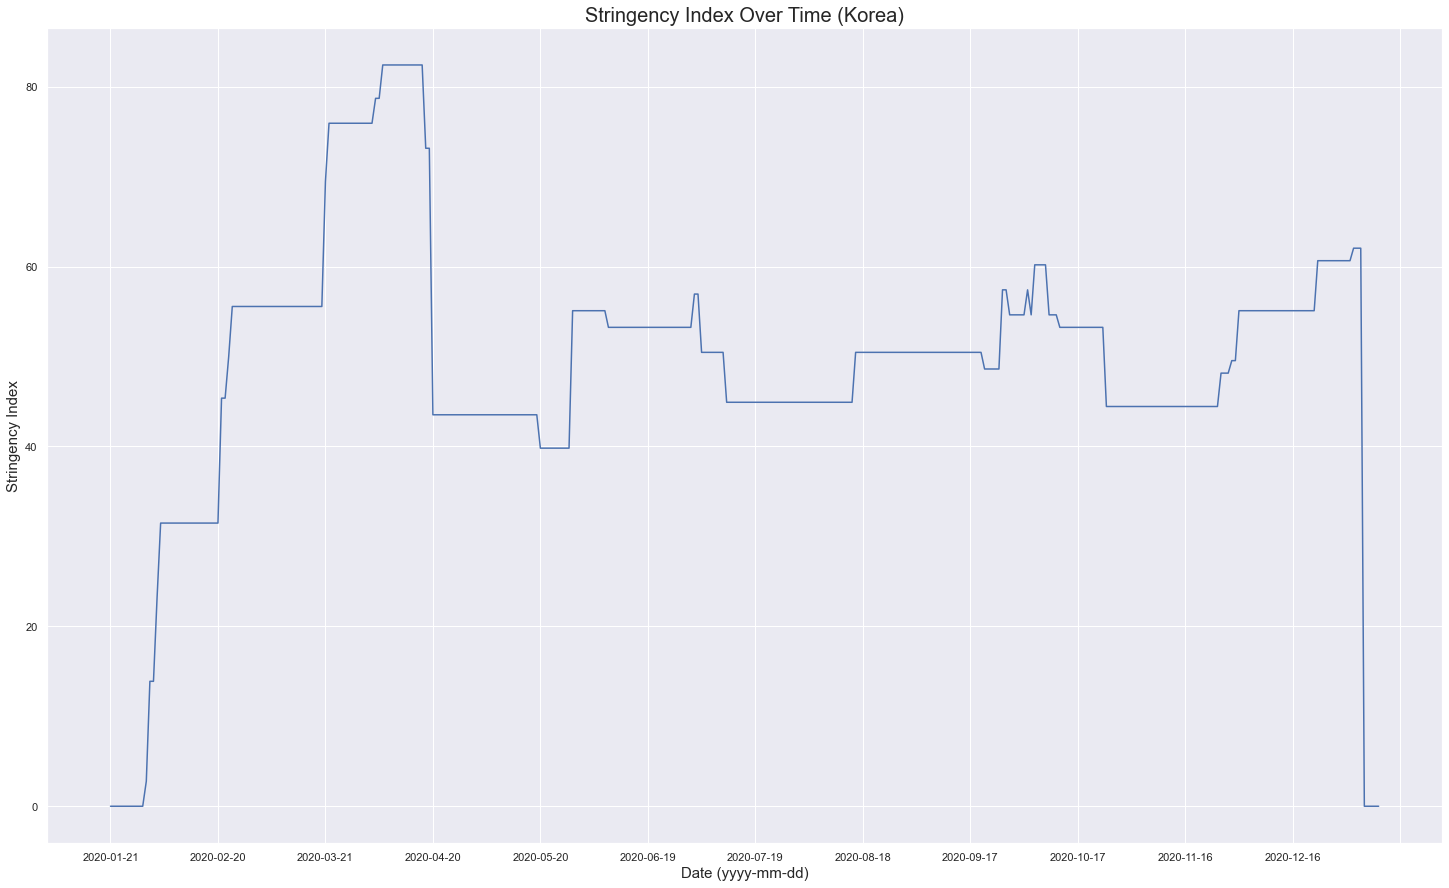

<Figure size 432x288 with 0 Axes>

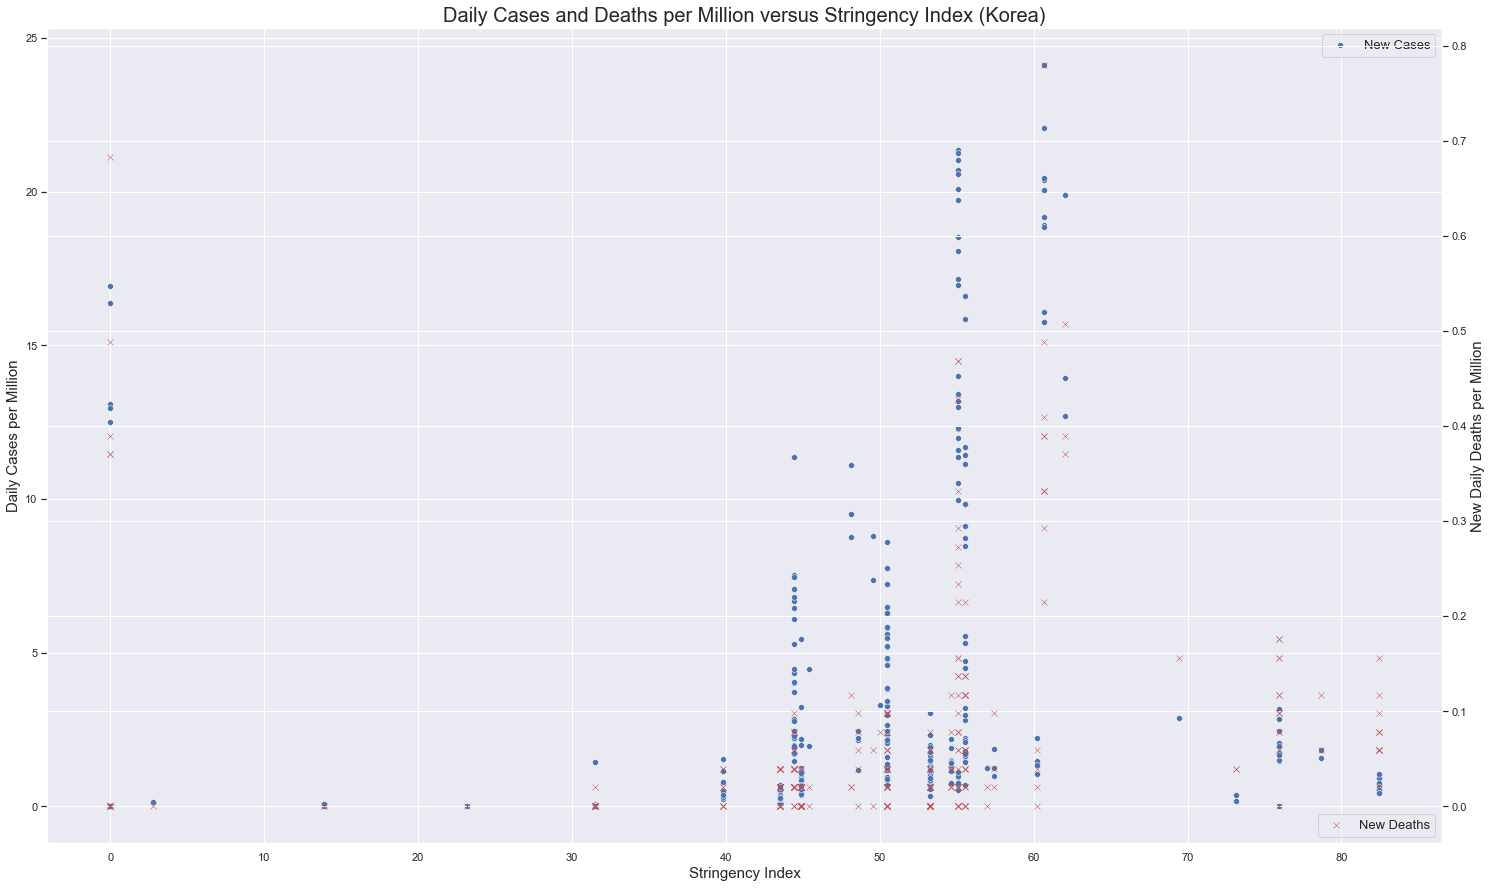

In [99]:
# extract data for Korea data
kor_data = pd.DataFrame.from_dict(data.loc['KOR','data'])
kor_data.replace(np.nan, 0, inplace=True)

# plot stringency index over time
fig, ax = plt.subplots(figsize=(25,15))
sns.set_theme()
ax = sns.lineplot(data=kor_data, x='date',y='stringency_index')
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.set_title('Stringency Index Over Time (Korea)',size=20)
ax.set_ylabel('Stringency Index', size=15)
ax.set_xlabel('Date (yyyy-mm-dd)', size=15)

# plot new daily cases and deaths versus stringency index
plt.figure()
fig, ax = plt.subplots(figsize=(25,15))
sns.set_theme()
ax = sns.scatterplot(data=kor_data, x='stringency_index',y='new_cases_per_million', s=35)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.set_title('Daily Cases and Deaths per Million versus Stringency Index (Korea)',size=20)
ax.set_ylabel('Daily Cases per Million', size=15)
ax.set_xlabel('Stringency Index', size=15)
ax2 = ax.twinx()
sns.scatterplot(data=kor_data, x='stringency_index',y='new_deaths_per_million', s=35, ax=ax2, color='r', marker='x')
ax2.set_ylabel('New Daily Deaths per Million', size=15)
ax.legend(['New Cases'], prop={'size': 13})
ax2.legend(['New Deaths'], loc=4, prop={'size': 13})

***Note: high case and death values occuring at x=0 are due to missing values in the dataset***

When comparing the plots for Korea to the plots for the US, there are a few noticeable  
differences:  
1. The stringency index of Korea began increasing in early-February, much earlier than  
the US. Reasons for this may include:
    - Earlier virus outbreak due to proximity to China and frequency of travel between  
    the two countries
    - A more preemptive/preventative approach to handling the pandemic
    - A more aggressive approach to handling the pandemic
2. Korea showed more of a spike in stringency during initial outbreak then soon dropped  
and stayed within the range of 40 to 60. Only recently did the stringency value go back  
to over 60. Reasons for this may include:
    - A more effective general pandemic response approach allowing for restrictions to  
    be relaxed after the inital outbreak was contained
    - The stringency index does not fully cover the 'strictness' of policies enforced  
    and the contexts surrounding them, thus leading to either inflated or deflated  
    index values
3. Because Korea has stayed within the 40 to 60 index range for most of the year,  most  
of the case and death values occured in that range. Korea experienced a higher maximum  
stringency index than the US, but the highest normalized case and death rates occured  
around an index value of 60 (in the US, the highest rates occured near its maximum index  
value at a little over 70.

In terms of the amount of daily cases and deaths per million, Korea experienced much  
lower numbers accross the board during comparable timeframes.

# Analysis 3: Global Values

As of now, I've only made the following plots to test how they would look. As for which  
countries I'd like to compare for analysis, I haven't decided yet

In [100]:
# compile metrics over time for various countries

cot = pd.DataFrame() # cases per million over time
dot = pd.DataFrame() # deaths per million over time
for i, row in data.iterrows():
    country_data = pd.DataFrame.from_dict(data.loc[i,'data'])
    country_data.replace(np.nan, 0, inplace=True)
    for j, row2 in country_data.iterrows():
        date = row2['date']
        row2
        try:
            cot.loc[date, i] = row2['new_cases_per_million']
        except:
            cot.loc[date, i] = 'no_data'
        try:
            dot.loc[date, i] = row2['new_deaths_per_million']
        except:
            dot.loc[date, i] = 'no_data'

In [101]:
# Some countries have inconsistencies with extra rows of null values
cot.drop(cot.tail(55).index,inplace=True)
dot.drop(dot.tail(55).index,inplace=True)

Text(0.5, 0, 'Date (yyyy-mm-dd)')

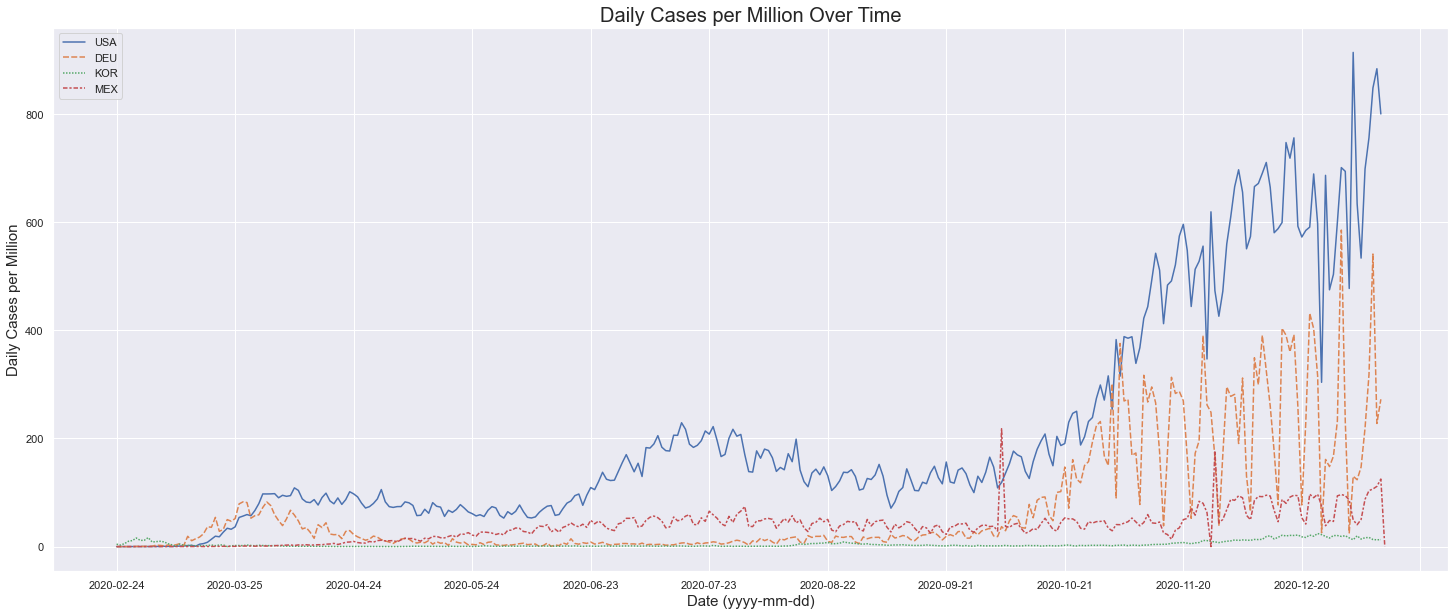

In [102]:
# plot total deaths per million of USA, Germany, and Korea
cot_data = cot.loc[:, ['USA','DEU','KOR','MEX']]
fig, ax = plt.subplots(figsize=(25,10))
sns.set_theme()
ax = sns.lineplot(data=cot_data)
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.set_title('Daily Cases per Million Over Time', size=20)
ax.set_ylabel('Daily Cases per Million', size=15)
ax.set_xlabel('Date (yyyy-mm-dd)', size=15)

Text(0.5, 0, 'Date (yyyy-mm-dd)')

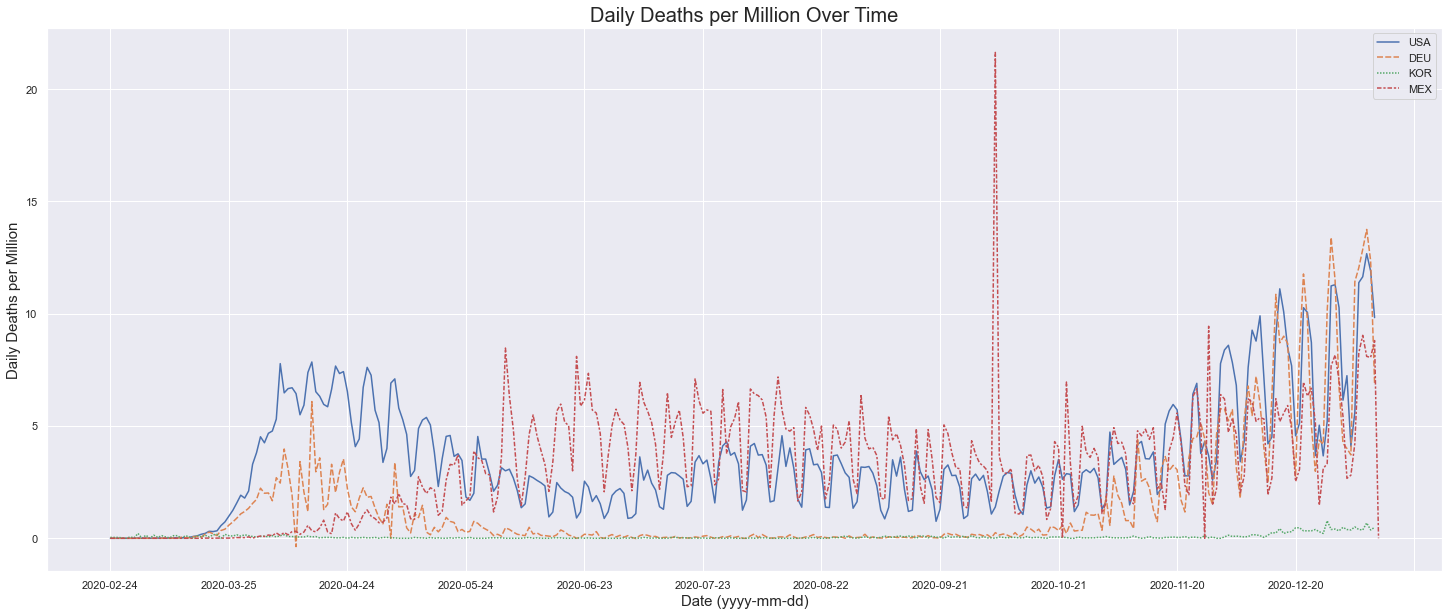

In [103]:
# plot total deaths per million of USA, Germany, and Korea
dot_data = dot.loc[:, ['USA','DEU','KOR','MEX']]
fig, ax = plt.subplots(figsize=(25,10))
sns.set_theme()
ax = sns.lineplot(data=dot_data)
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.set_title('Daily Deaths per Million Over Time', size=20)
ax.set_ylabel('Daily Deaths per Million', size=15)
ax.set_xlabel('Date (yyyy-mm-dd)', size=15)

# Analysis 4: Predicting US Case Numbers

Now I'll try to make a few predictive models of COVID cases in the US

Text(0.5, 0, 'Date (yyyy-mm-dd)')

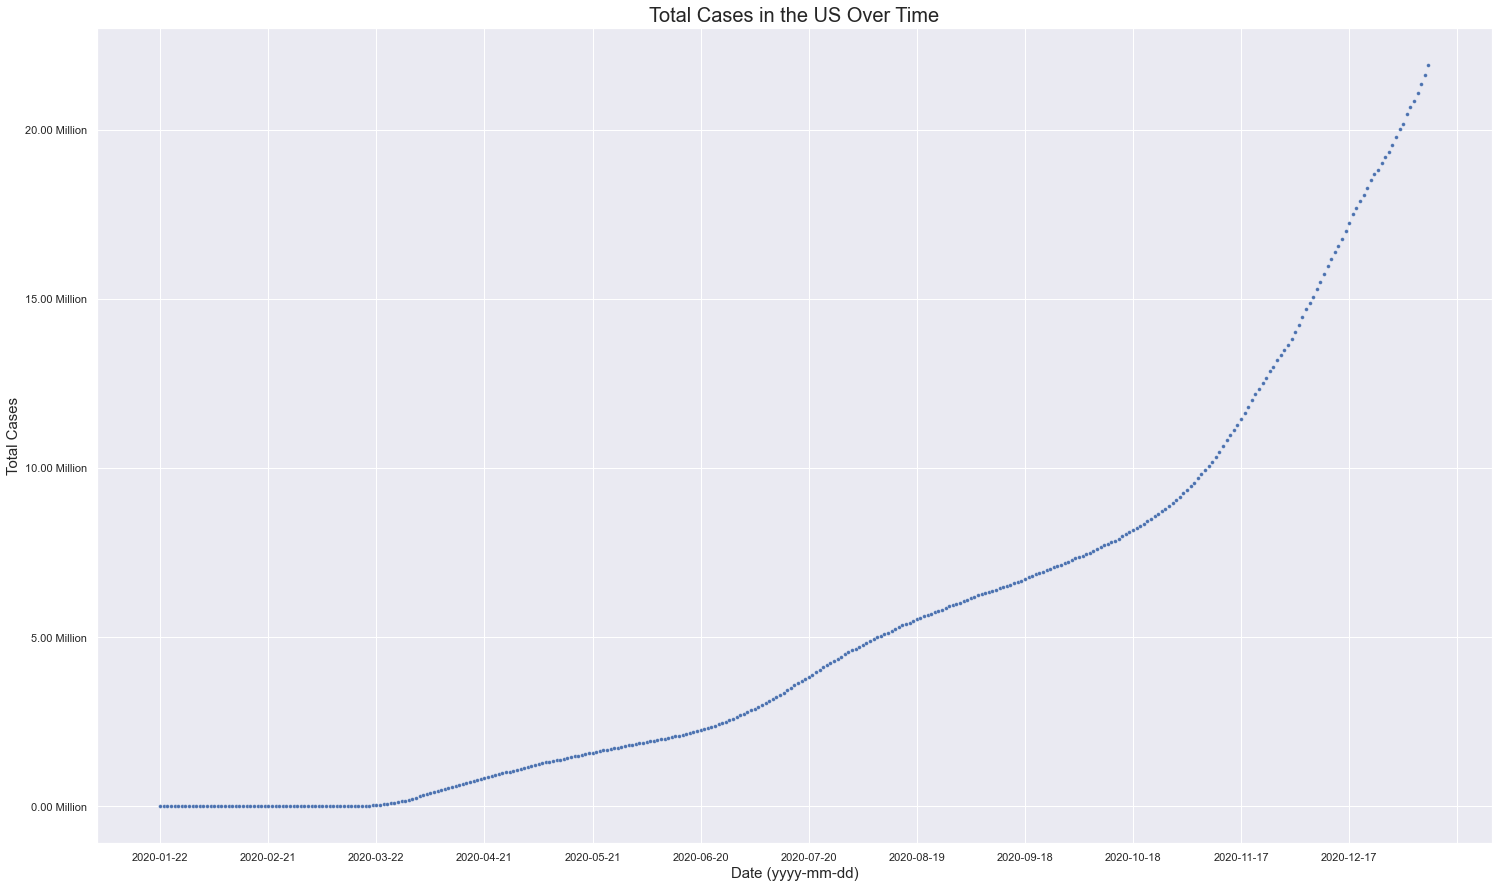

In [104]:
# Plot US case data
# plot total cases over time
fig, ax = plt.subplots(figsize=(25,15))
sns.set_theme()
ax = sns.scatterplot(data=usa_data, x='date',y='total_cases', s=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + ' Million'))
ax.set_title('Total Cases in the US Over Time',size=20)
ax.set_ylabel('Total Cases', size=15)
ax.set_xlabel('Date (yyyy-mm-dd)', size=15)

Visually speaking, it seems like total cases are increasing at an exponential rate. I  
will try a few different regression models to see what may work. The types of linear  
models I plan to use are a regular polynomial regression, a Ridge regression, and a  
Lasso regression. From my basic understnding, each of these three are variations of linear  
regression. The main difference between the three is the cost function they use to  
determine the best fitting model. Standard regression uses only the sum of the squares  
of the residual errors found between the model and test data. This causes standard  
regression to be the most prone to overfitting since the model will try to make a fit  
purely based on how close it is to the original test data. Ridge and Lasso regression  
add an additional element to the cost function on top of the square residual error.  
This additional element is based on the slope coefficients of the model (Ridge regression  
is based on the square of the coefficient sum while Lasso is based on the absolute value).  
The addition of this element makes the model find a balance between fitting for residual  
error and fitting to avoid being too steep so that the cost function when testing non-  
training data is also minimized.

I'll start with a polynomial regression.

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# split up dataset into testing and training groups, cut off the first~ 50 days where case values are near zero
index = np.reshape(usa_data.index, (-1, 1))
t_cases = np.array(usa_data['total_cases'])
x_train, x_test, y_train, y_test = train_test_split(index[40:,:], t_cases[40:], test_size=0.4, random_state=2)

# make polynomial regression models with varying degrees and evaluate performance
degrees = np.arange(2,10)
r2 = []
rmse = []
for i in degrees:
    poly = PolynomialFeatures(degree=i)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.fit_transform(x_test)

    # make linear regression model
    clf = LinearRegression()
    clf.fit(x_train_poly, y_train)
    y_predict = clf.predict(x_test_poly)
    r2.append(r2_score(y_test, clf.predict(x_test_poly)))
    rmse.append(mean_squared_error(y_test, clf.predict(x_test_poly), squared=False))
print(r2)
print(rmse)

[0.9698794377743662, 0.9879800970976723, 0.9965681452788699, 0.9971181954491174, 0.9979888922663472, 0.9990690067523317, 0.9984640190111228, 0.9985965738569584]
[909110.7875061503, 574295.9502713352, 306866.67066674464, 281201.4368888294, 234910.77741801468, 159830.08840026878, 205294.91591211382, 196236.6201450782]


In the cell above, I made multiple polynomial regression fits to the total case data with  
degree ranging from 2 to 10. As expected, higher degree models showed less error, but also  
are likely to be overfitted, so I'll take a visual look.

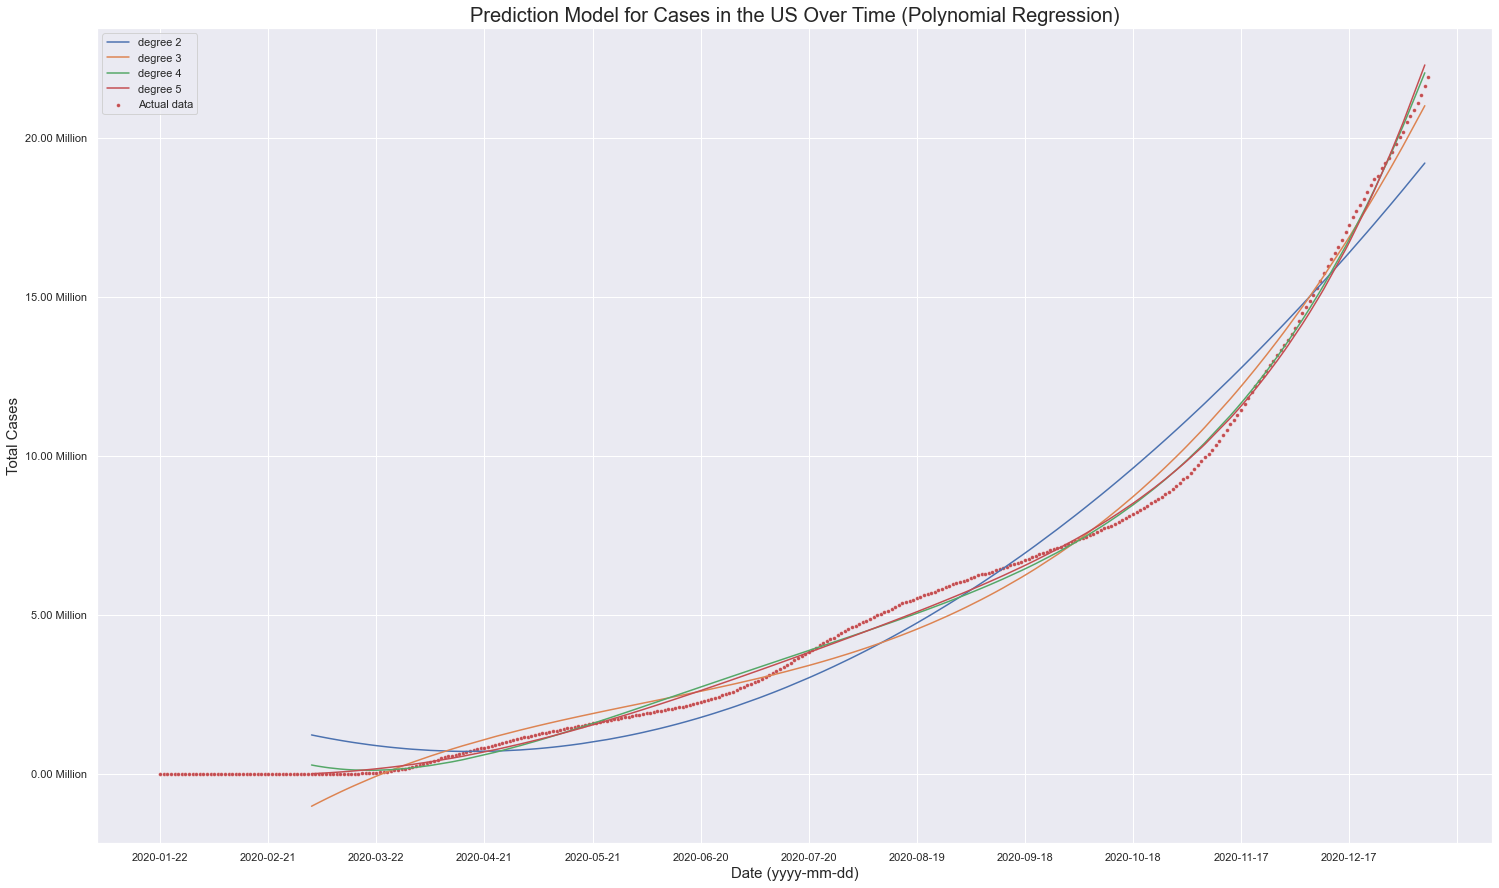

In [106]:
fig, ax = plt.subplots(figsize=(25,15))
sns.set_theme()
ax = sns.scatterplot(data=usa_data, x='date',y='total_cases', color='r', s=15)

ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + ' Million'))
ax.set_title('Prediction Model for Cases in the US Over Time (Polynomial Regression)',size=20)
ax.set_ylabel('Total Cases', size=15)
ax.set_xlabel('Date (yyyy-mm-dd)', size=15)

test_degrees=[2,3,4,5]

for i in test_degrees:
    poly = PolynomialFeatures(degree=i)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.fit_transform(x_test)

    # make linear regression model
    clf = LinearRegression()
    clf.fit(x_train_poly, y_train)
    y_predict = clf.predict(x_test_poly)
    ax = sns.lineplot(x=np.ndarray.flatten(x_test), y=np.array(y_predict))
ax.legend(['degree 2', 'degree 3','degree 4','degree 5','Actual data'])

The plot above shows the results of three regression models of degree 2 through 5. We see  
a noticeable improvement as we increase the degree of the polynomial fit. Data from the  
first 40 days of data collection were trimmed off in order to get fit that is more fitting  
for the portion of data where cases are rising. Further analysis on the polynomial regression  
could be made through more quantitative and qualitative comparisons betweeen varying degrees  
of polynomial fits, but for now, I will move on to trying out other types of models to see  
how they stack up and use the polynomial fit of degree 4 as the reference for comparison.

 beta_1 = 6.541965, beta_2 = 0.798337
0.9597281343511536
1131827.6552004253


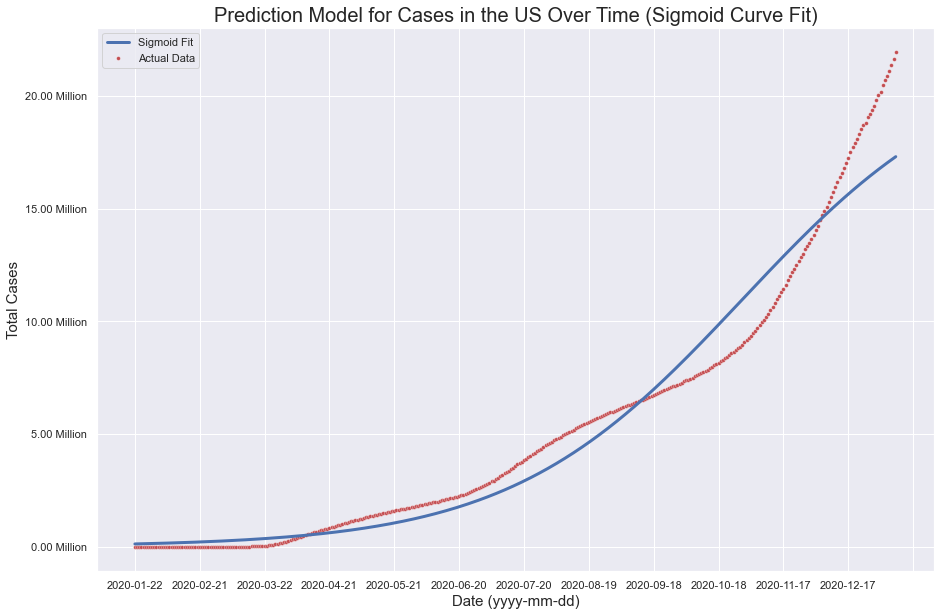

In [107]:
# Make a sigmoid fit for the data
from sklearn.preprocessing import MinMaxScaler
from scipy.optimize import curve_fit

# define sigmoid function
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

# get data to be used for curve fitting
x_data = np.reshape(usa_data.index, (-1, 1))
y_data = usa_data['total_cases']

# normalize and reformat data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)
xdata = xdata.flatten().transpose()

# make curve fit to get function parameters
popt, pcov = curve_fit(sigmoid, xdata, ydata)

#print the parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

# plot the curve fit over the actual data
fig, ax = plt.subplots(figsize=(15,10))
x = x_data/max(x_data)
y = sigmoid(x, *popt)*max(y_data)
ax = sns.scatterplot(data=usa_data, x='date',y='total_cases', color='r', s=15)
plt.plot(x_data,y, linewidth=3.0, label='fit')
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + ' Million'))
ax.set_title('Prediction Model for Cases in the US Over Time (Sigmoid Curve Fit)',size=20)
ax.set_ylabel('Total Cases', size=15)
ax.set_xlabel('Date (yyyy-mm-dd)', size=15)
ax.legend([ 'Sigmoid Fit', 'Actual Data'])

print(r2_score(y_data, y))
print(mean_squared_error(y_data, y, squared=False))

Above is a simple sigmoid curve fit to the data. Compared to the previous polynomial  
regression, the curve has more error. In hindsight, a sigmoid fit would not have  
been ideal for a predictive model that assumes continuous growth anyways, since the  
model would eventually plateau after a certain point (which could be used to make  
a more realistic model, but that cannot be predicted easily). Regardless, this was  
still good practice for simple curve fitting and modeling. 

Next I'll try to use a Ridge Regression model to make a predictive model.

R2 score =  0.9721290690888078
Root mean squared error =  874502.4115993577


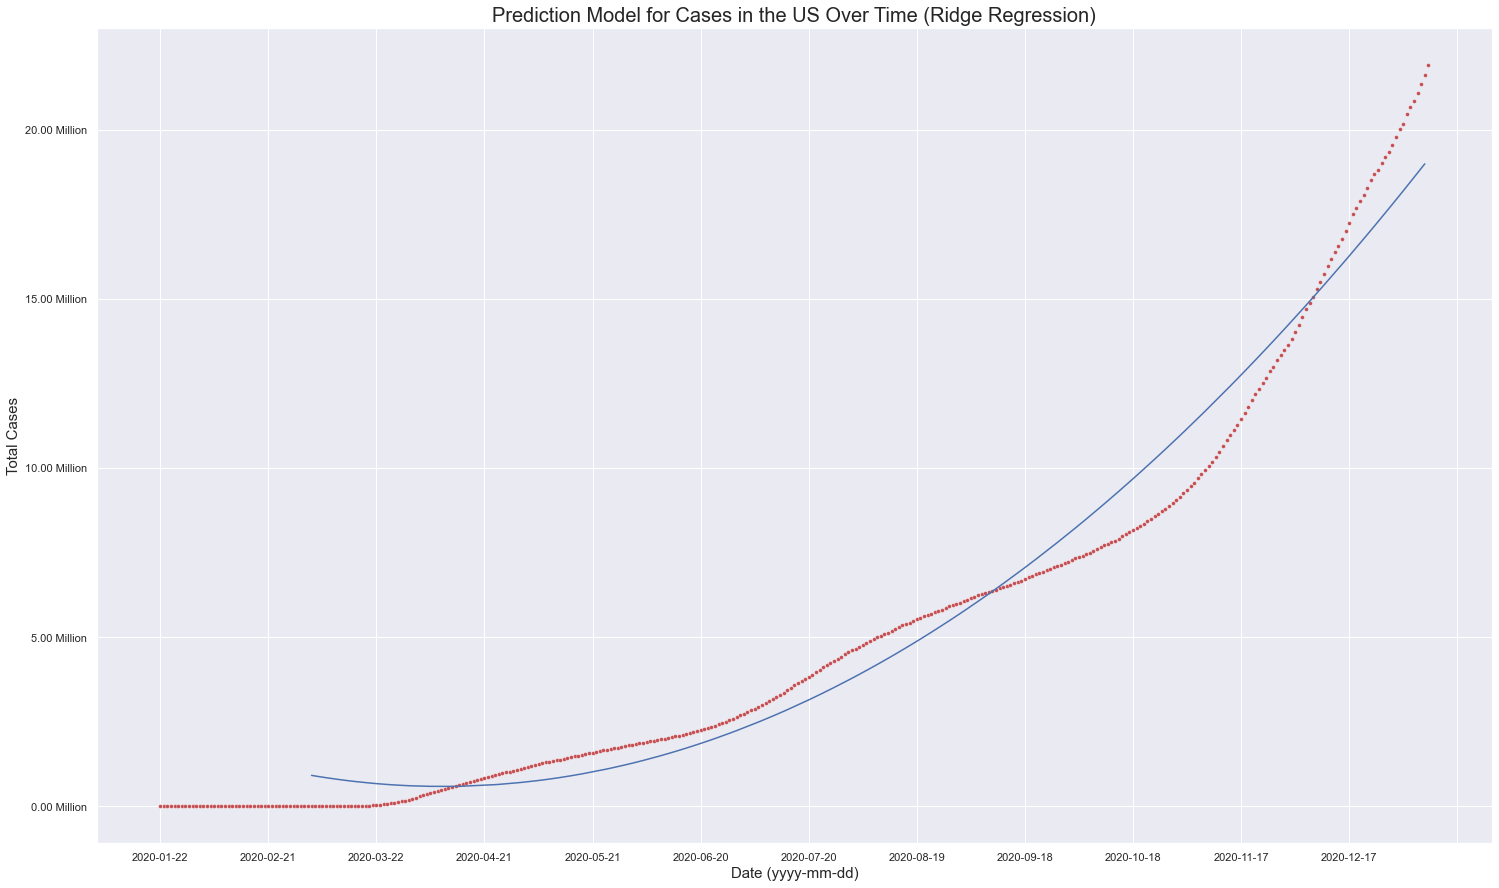

In [108]:
# Ridge regression fit for the data
from sklearn.linear_model import Ridge

# set ridge alpha value to 0.1
RidgeModel=Ridge(alpha=10000)

# do 2nd degree polynomial for first test
poly = PolynomialFeatures(degree=2)

# use the same train/test split values from the polynomial regression
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

# make linear regression model
RidgeModel.fit(x_train_poly, y_train)
y_predict = RidgeModel.predict(x_test_poly)

fig, ax = plt.subplots(figsize=(25,15))
sns.set_theme()

ax = sns.scatterplot(data=usa_data, x='date',y='total_cases', color='r', s=15)

ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + ' Million'))
ax.set_title('Prediction Model for Cases in the US Over Time (Ridge Regression)',size=20)
ax.set_ylabel('Total Cases', size=15)
ax.set_xlabel('Date (yyyy-mm-dd)', size=15)

ax = sns.lineplot(x=np.ndarray.flatten(x_test), y=np.array(y_predict))

print('R2 score = ', r2_score(y_test, y_predict))
print('Root mean squared error = ', mean_squared_error(y_test, y_predict, squared=False))

Not bad. However, the Ridge regression model is affected by both its alpha value and the  
degree of the polynomial, so I'll change those values to check model error. First, I'll  
start off with finding the best alpha value using GridSearchCV

In [109]:
# use gridsearch to do ridge regression with multiple alpha values
from sklearn.model_selection import GridSearchCV

# set alpha parameters to be tested
parameters= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]

Grid = GridSearchCV(Ridge(), parameters,cv=4)
Grid.fit(x_train, y_train)

Grid.best_estimator_

Ridge(alpha=1000)

R squared error with ascending degree: [0.9721290690888078, 0.984805182788481, 0.9941800864365683, 0.9971166263731286]
Root mean squared error with ascending degree: [874502.4115993577, 645703.3121138507, 399616.619286826, 281277.98031358566]


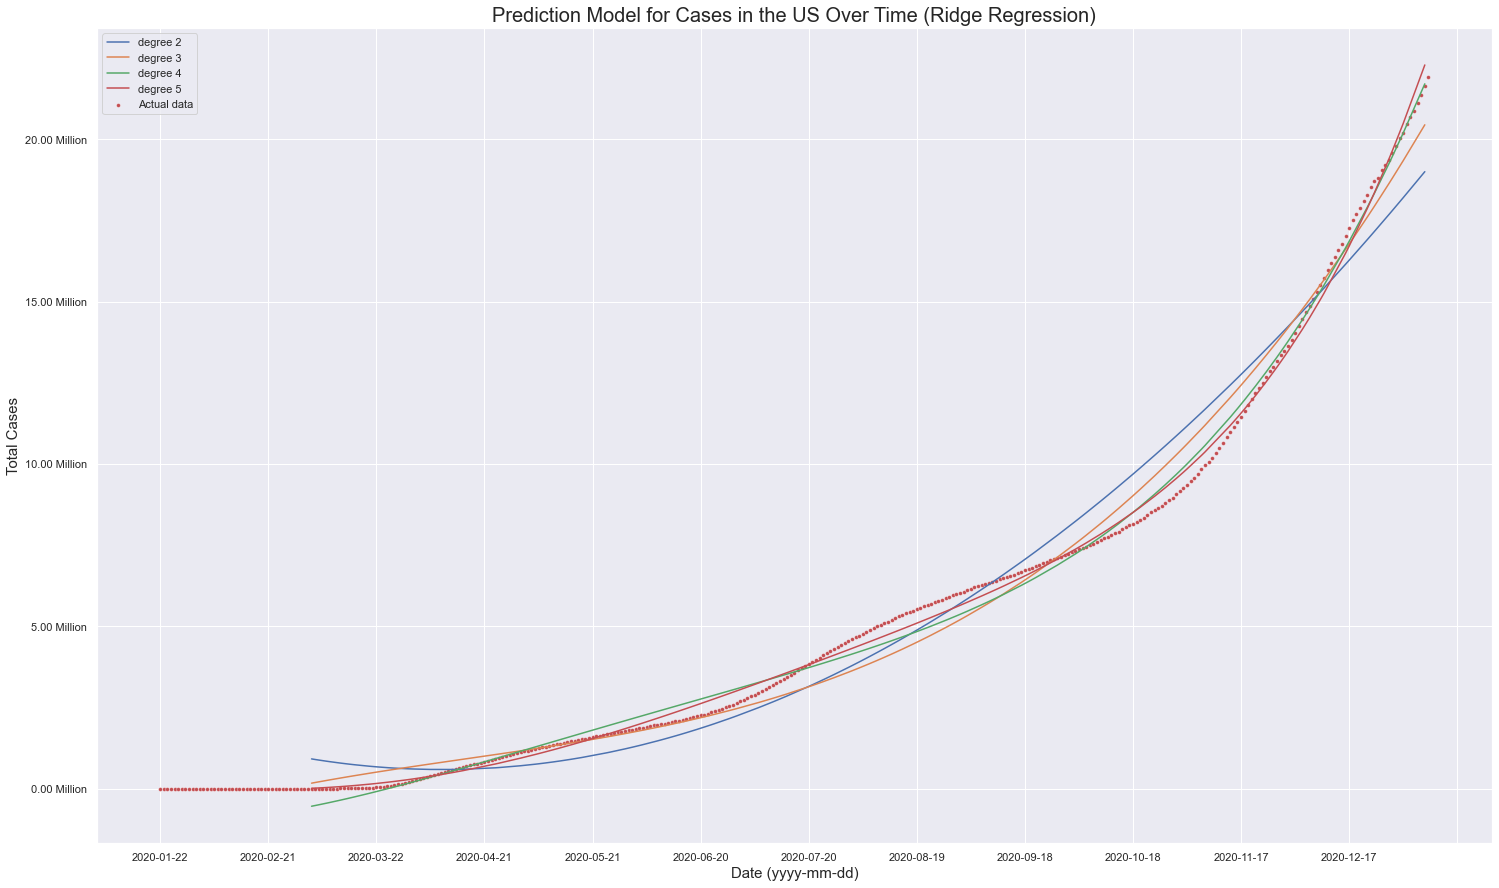

In [110]:
# best alpha value was found to be 10000 from gridsearch, so now we iterate through polynomial degrees

fig, ax = plt.subplots(figsize=(25,15))
sns.set_theme()
ax = sns.scatterplot(data=usa_data, x='date',y='total_cases', color='r', s=15)

ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + ' Million'))
ax.set_title('Prediction Model for Cases in the US Over Time (Ridge Regression)',size=20)
ax.set_ylabel('Total Cases', size=15)
ax.set_xlabel('Date (yyyy-mm-dd)', size=15)

test_degrees=[2,3,4,5]

r2 = []
rmse = []
for i in test_degrees:
    poly = PolynomialFeatures(degree=i)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.fit_transform(x_test)

    # make linear regression model
    RidgeModel = Ridge(alpha = 10000)
    RidgeModel.fit(x_train_poly, y_train)
    y_predict = RidgeModel.predict(x_test_poly)
    ax = sns.lineplot(x=np.ndarray.flatten(x_test), y=np.array(y_predict))
    
    # get error
    r2.append(r2_score(y_test, RidgeModel.predict(x_test_poly)))
    rmse.append(mean_squared_error(y_test, RidgeModel.predict(x_test_poly), squared=False))
ax.legend(['degree 2', 'degree 3','degree 4', 'degree 5','Actual data'])

print('R squared error with ascending degree:', r2)
print('Root mean squared error with ascending degree:',rmse)

Above are the Ridge prediction models for an alpha value of 10000 from degrees 2 through 5.  
As expected, predection models with higher degrees showed less error. Starting from degree  
4, noticeable diminishing returns on error improvement were seen. Between the degree 4 and  
degree 5 model, it's hard to say which one would be a better predictive model. I'll make an  
expanded plot to show the trajectories of the models beyond the present.

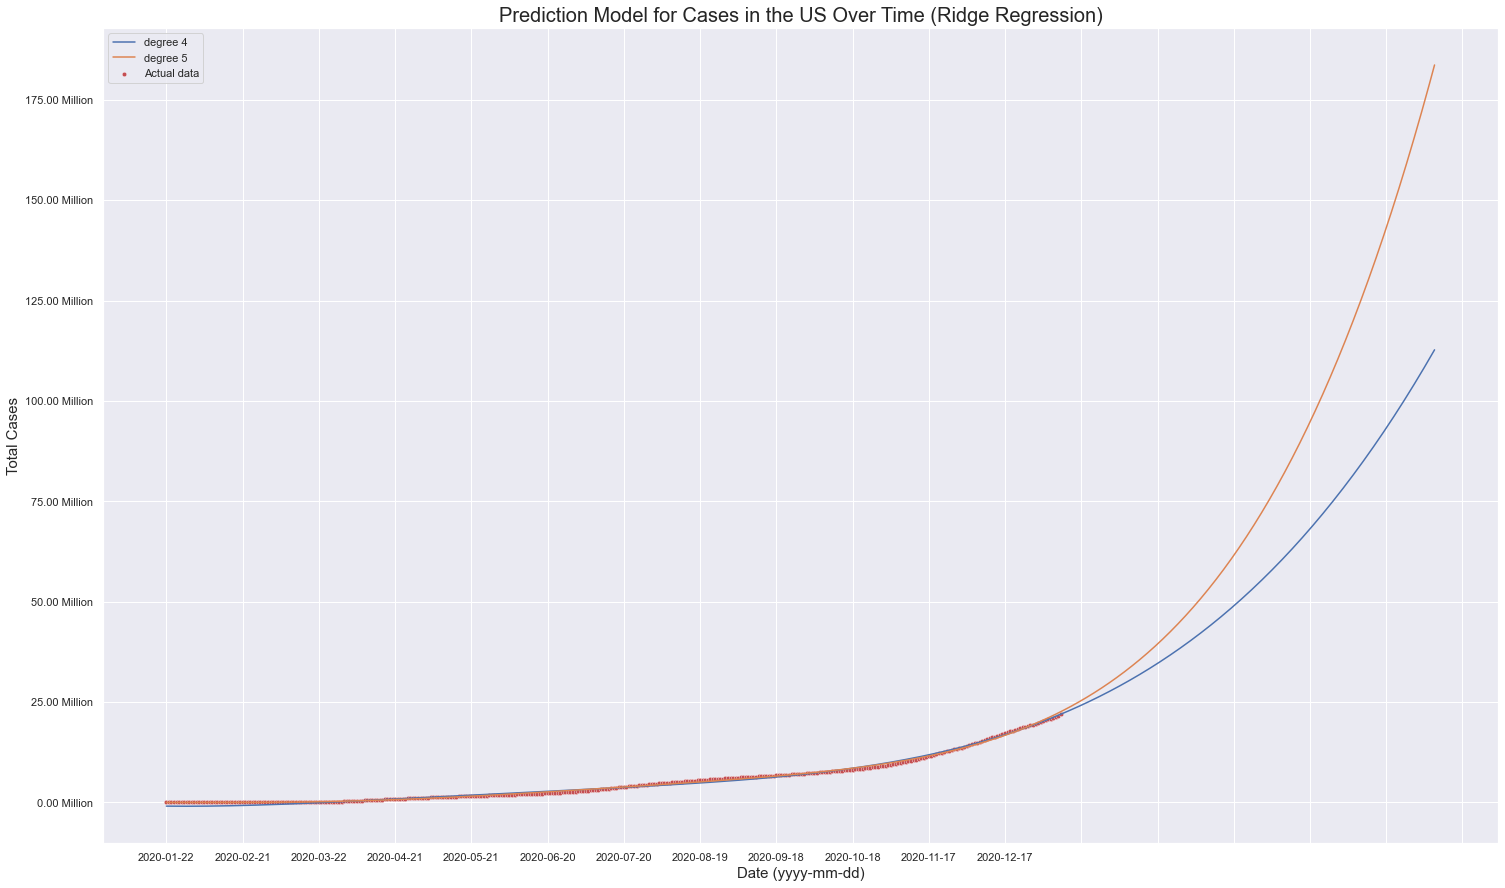

In [111]:
# visualize long-term prediction
predict_x = np.reshape(np.arange(500), (-1, 1))

predict_degrees=[4,5]

fig, ax = plt.subplots(figsize=(25,15))
sns.set_theme()
ax = sns.scatterplot(data=usa_data, x='date',y='total_cases', color='r', s=20)

ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + ' Million'))
ax.set_title('Prediction Model for Cases in the US Over Time (Ridge Regression)',size=20)
ax.set_ylabel('Total Cases', size=15)
ax.set_xlabel('Date (yyyy-mm-dd)', size=15)

for i in predict_degrees:
    poly = PolynomialFeatures(degree=i)
    x_train_poly = poly.fit_transform(x_train)
    x_predict_poly = poly.fit_transform(predict_x)

    # make linear regression model
    RidgeModel = Ridge(alpha = 10000)
    RidgeModel.fit(x_train_poly, y_train)
    predict = RidgeModel.predict(x_predict_poly)
    ax = sns.lineplot(x=np.ndarray.flatten(predict_x), y=np.array(predict))

ax.legend(['degree 4', 'degree 5','Actual data'])

When looking at the trajectories of the two models, the model using a degree of 4 seems like  
a more reasonable prediction of total case numbers (based on the trend up to now). However,  
the model using a degree of 5 could also be entirely possible under the case that more   
aggressive variants of COVID-19 appear and pandemic restrictions are lifted (or less people  
follow them).  For final comparison with other models, I will use the model with degree 4.

Lastly, it's time to try a lasso regression model.

In [112]:
from sklearn.linear_model import Lasso

# set alpha parameters to be tested
parameters= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]

lasso = Lasso()

Grid = GridSearchCV(lasso, parameters,cv=4)
Grid.fit(x_train, y_train)

Grid.best_estimator_

Lasso(alpha=100000)

R squared error with ascending degree: [0.9700303542322167, 0.9880941690716613, 0.9963062572390097, 0.9971159689547718]
Mean squared error with ascending degree: [906830.4172461822, 571564.3456815045, 318360.07448658964, 281310.0446230223]


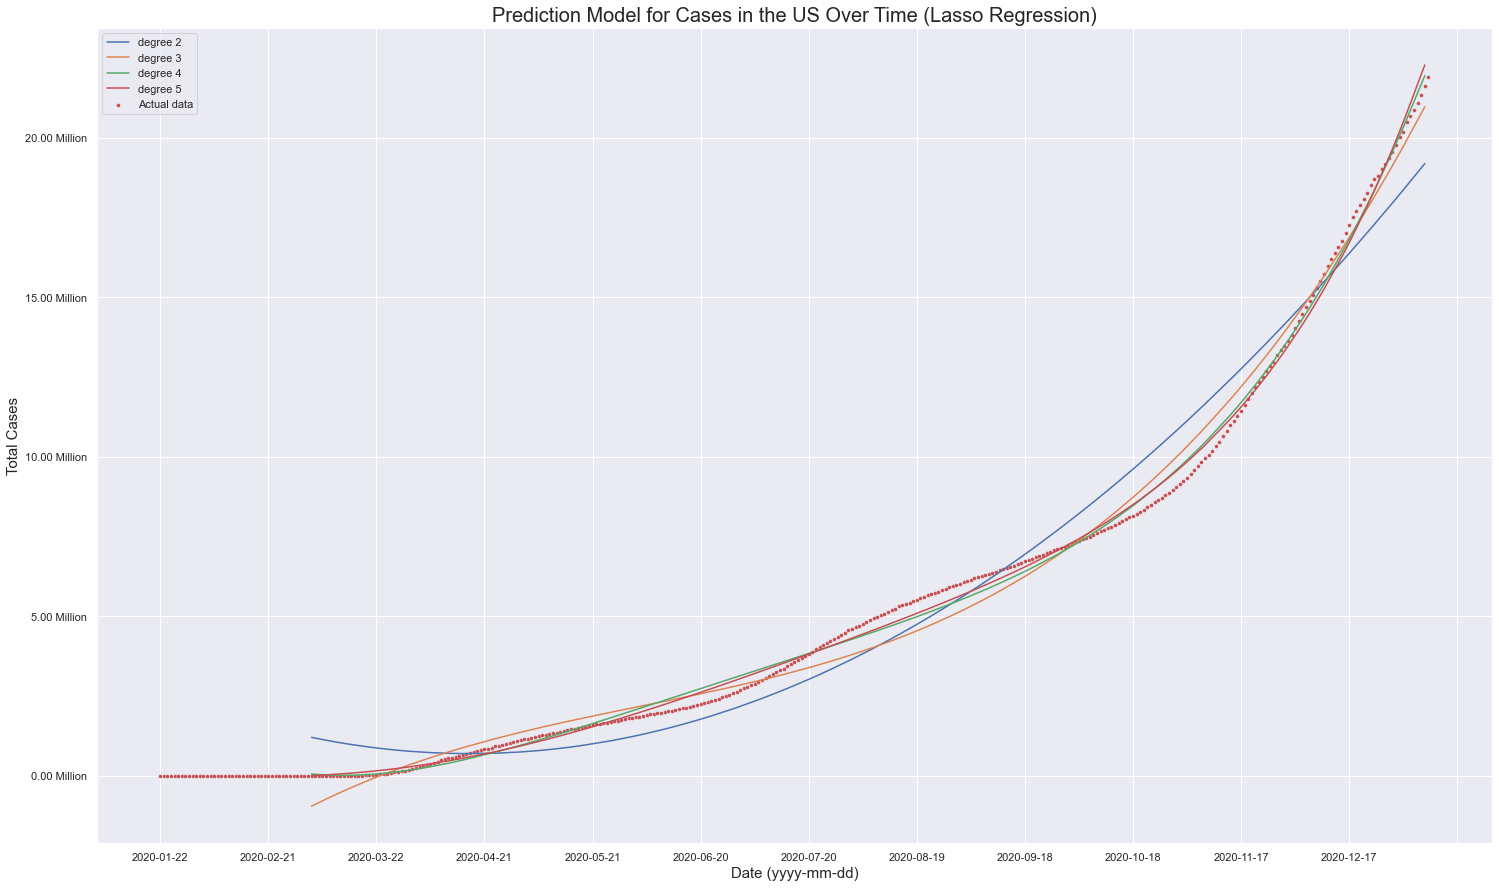

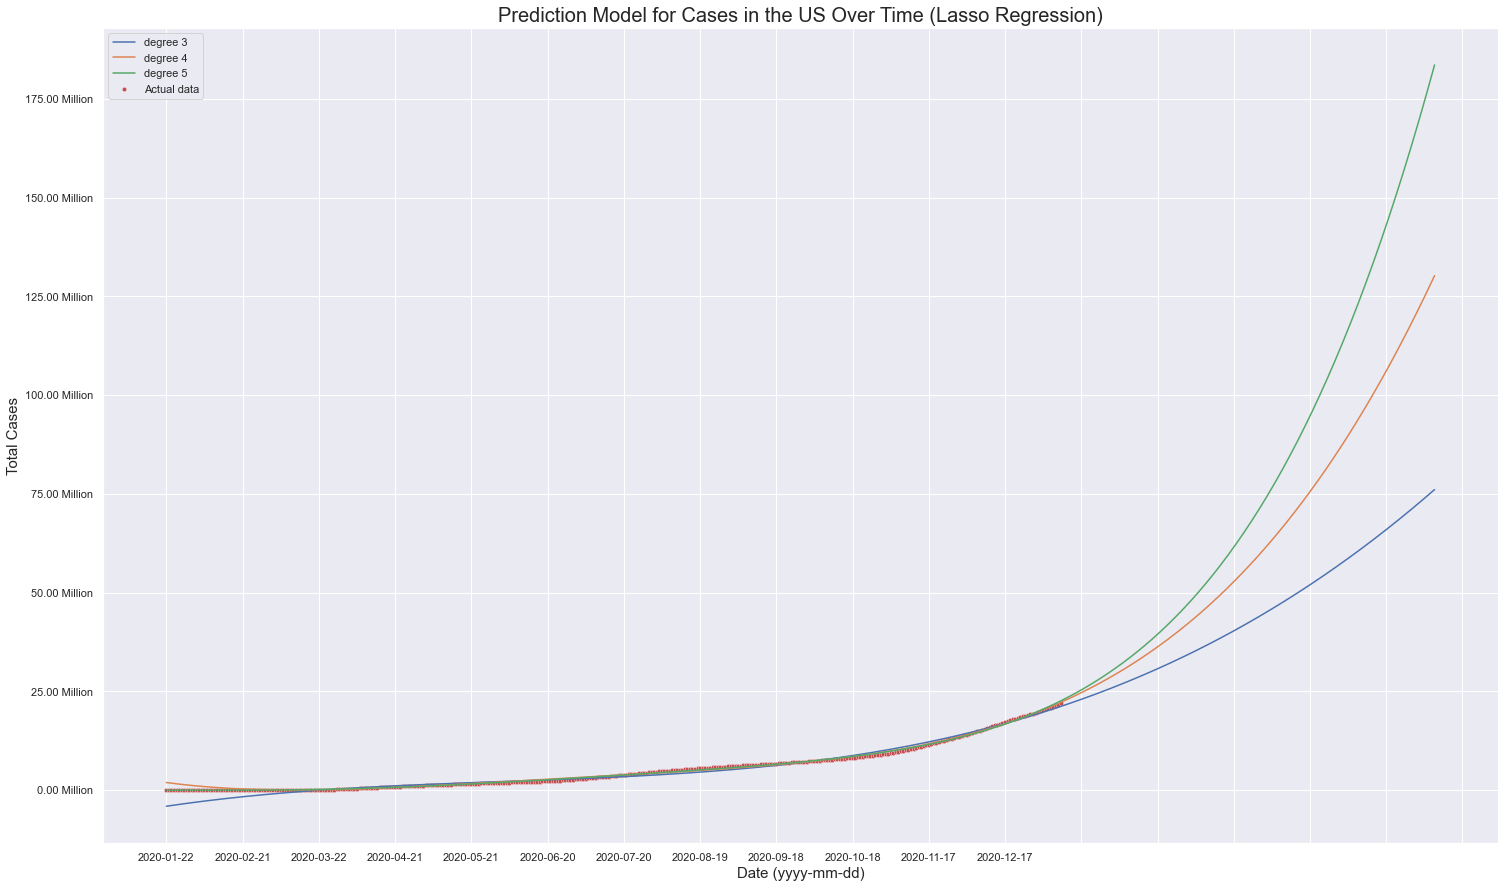

In [113]:
# best alpha value was found to be 10000 from gridsearch, so now we iterate through polynomial degrees

fig, ax = plt.subplots(figsize=(25,15))
sns.set_theme()
ax = sns.scatterplot(data=usa_data, x='date',y='total_cases', color='r', s=15)

ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + ' Million'))
ax.set_title('Prediction Model for Cases in the US Over Time (Lasso Regression)',size=20)
ax.set_ylabel('Total Cases', size=15)
ax.set_xlabel('Date (yyyy-mm-dd)', size=15)

test_degrees=[2,3,4,5]

r2 = []
rmse = []
for i in test_degrees:
    poly = PolynomialFeatures(degree=i)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.fit_transform(x_test)

    # make linear regression model, max iterations must be 10000000 for solution to converge
    LassoModel = Lasso(alpha = 100000,tol=.0001,max_iter=10000000)
    LassoModel.fit(x_train_poly, y_train)
    y_predict = LassoModel.predict(x_test_poly)
    ax = sns.lineplot(x=np.ndarray.flatten(x_test), y=np.array(y_predict))
    
    # get error
    r2.append(r2_score(y_test, LassoModel.predict(x_test_poly)))
    rmse.append(mean_squared_error(y_test, LassoModel.predict(x_test_poly), squared=False))
ax.legend(['degree 2', 'degree 3','degree 4', 'degree 5','Actual data'])

print('R squared error with ascending degree:', r2)
print('Mean squared error with ascending degree:',rmse)

# visualize long-term prediction
predict_x = np.reshape(np.arange(500), (-1, 1))

predict_degrees=[3,4,5]

fig, ax = plt.subplots(figsize=(25,15))
sns.set_theme()
ax = sns.scatterplot(data=usa_data, x='date',y='total_cases', color='r', s=20)

ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + ' Million'))
ax.set_title('Prediction Model for Cases in the US Over Time (Lasso Regression)',size=20)
ax.set_ylabel('Total Cases', size=15)
ax.set_xlabel('Date (yyyy-mm-dd)', size=15)

for i in predict_degrees:
    poly = PolynomialFeatures(degree=i)
    x_train_poly = poly.fit_transform(x_train)
    x_predict_poly = poly.fit_transform(predict_x)

    # make linear regression model
    LassoModel = Lasso(alpha = 100000,tol=.0001,max_iter=10000000)
    LassoModel.fit(x_train_poly, y_train)
    predict = LassoModel.predict(x_predict_poly)
    ax = sns.lineplot(x=np.ndarray.flatten(predict_x), y=np.array(predict))

ax.legend(['degree 3', 'degree 4', 'degree 5','Actual data'])

Above are the Lasso prediction models for an alpha value of 10000 from degrees 2 through 5.  
When comparing the error scores and future trajectories of the Lasso model using degrees 3,  
4 , and 5, the model with degree 4 is most in-line with the other models that were selected  
for final comparison. 

Now I'll compare the different regression models.

[Text(-30.0, 0, '2019-12-23'),
 Text(0.0, 0, '2020-01-22'),
 Text(30.0, 0, '2020-02-21'),
 Text(60.0, 0, '2020-03-22'),
 Text(90.0, 0, '2020-04-21'),
 Text(120.0, 0, '2020-05-21'),
 Text(150.0, 0, '2020-06-20'),
 Text(180.0, 0, '2020-07-20'),
 Text(210.0, 0, '2020-08-19'),
 Text(240.0, 0, '2020-09-18'),
 Text(270.0, 0, '2020-10-18'),
 Text(300.0, 0, '2020-11-17'),
 Text(330.0, 0, '2020-12-17'),
 Text(360.0, 0, '2021-01-16'),
 Text(390.0, 0, '2021-02-15'),
 Text(420.0, 0, '2021-03-17'),
 Text(450.0, 0, '2021-04-16'),
 Text(480.0, 0, '2021-05-16'),
 Text(510.0, 0, '2021-06-15'),
 Text(540.0, 0, '')]

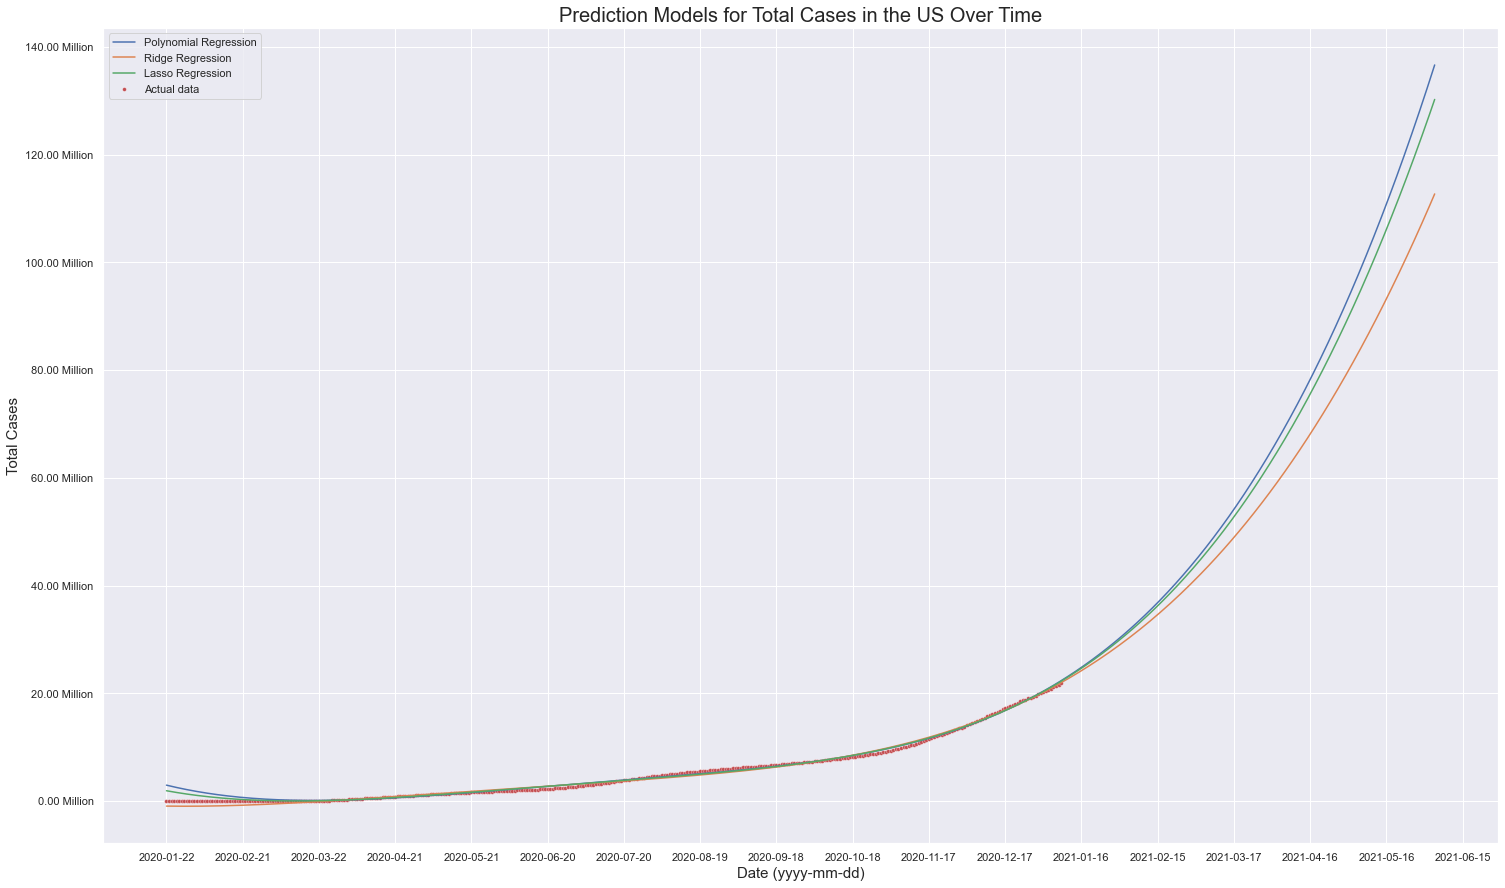

In [114]:
fig, ax = plt.subplots(figsize=(25,15))
sns.set_theme()
ax = sns.scatterplot(data=usa_data, x='date',y='total_cases', color='r', s=15)

ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + ' Million'))
ax.set_title('Prediction Models for Total Cases in the US Over Time',size=20)
ax.set_ylabel('Total Cases', size=15)
ax.set_xlabel('Date (yyyy-mm-dd)', size=15)

poly = PolynomialFeatures(4)

# poly regression
x_train_poly = poly.fit_transform(x_train)
x_predict_poly = poly.fit_transform(predict_x)
clf = LinearRegression()
clf.fit(x_train_poly, y_train)
predict = clf.predict(x_predict_poly)
ax = sns.lineplot(x=np.ndarray.flatten(predict_x), y=np.array(predict))

# Ridge regression
x_train_poly = poly.fit_transform(x_train)
x_predict_poly = poly.fit_transform(predict_x)
RidgeModel = Ridge(alpha = 10000)
RidgeModel.fit(x_train_poly, y_train)
predict = RidgeModel.predict(x_predict_poly)
ax = sns.lineplot(x=np.ndarray.flatten(predict_x), y=np.array(predict))

# Lasso regression
x_train_poly = poly.fit_transform(x_train)
x_predict_poly = poly.fit_transform(predict_x)
LassoModel = Lasso(alpha = 100000,tol=.0001,max_iter=10000000)
LassoModel.fit(x_train_poly, y_train)
predict = LassoModel.predict(x_predict_poly)
ax = sns.lineplot(x=np.ndarray.flatten(predict_x), y=np.array(predict))

ax.legend(['Polynomial Regression', 'Ridge Regression', 'Lasso Regression','Actual data'])

dates = pd.date_range(start='12/23/2019', end='6/30/2021')
dates = dates.date
dates = np.array(dates)
ax.set_xticklabels(dates[0::30])

Above we see the three different models and their predictive trajectories. Each of the models  
had the following error scores:

| Model | R Squared Error | Root Mean Squared Error |
| --- | ---- | ---- |
| Polynomial | 0.9966 | 306867 |
| Ridge | 0.9942 | 399617 |
| Lasso | 0.9963 | 318360 |

If we were to decide the best model solely on error scores, then the standard polynomial  
regression is the best model. However, like I mentioned near the start of this section,  
standard regression is most prone to overfitting, and good error scores may be an  
indicator of overfitting rather than being a good model. In terms of case numbers themselves,  
the regular regression and Lasso model showed similar values for long term growth while the  
Ridge model showed slightly lower values. Of the three models, I would say that the Ridge  
model actually does the best job at following the data trends from start to finish, but all  
three do a reasonable job of modeling case number trajectories.

### Self-Critiques
- Since this is my first time attempting to use machine learning libraries, there are still  
a lot of techniques/optimizations that I am not familiar with that probably could have been  
used to make better predictive models
- Making an accurate model for something like pandemic cases is difficult as there are many  
unpredictable factors that can affect it (government-imposed restrictions, public opinion  
of the virus, improvements in preemptive medicine and prevention measures, virus mutations,  
vaccine development, etc.), and I am not sure how to approach making a model that accounts  
for all of these factors

Ultimately, this became more of an exercise in learning and using some of the machine  
learning options available to Python and getting a feel for the overall process of making  
a predictive model, regardless of how accurate the final model may have been. 

# Next Steps

- Provide some more analysis in Analysis 2 to evaluate US stringency effectiveness and how  
it differs from Korea
- Continue with plotting, comparing, and analyzing COVID metrics between multiple countries  
around the world to get an idea of similarities and differences between them